In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
from selenium import webdriver
import time
import numpy as np
import time



# test case on muni documents.

In [2]:
import PyPDF2 
import textract
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [17]:
def getNumPages(self,password =''):
    """
    Calculates the number of pages in this PDF file.

    :return: number of pages
    :rtype: int
    :raises PdfReadError: if file is encrypted and restrictions prevent
        this action.
    """

    # Flattened pages will not work on an Encrypted PDF;
    # the PDF file's page count is used in this case. Otherwise,
    # the original method (flattened page count) is used.
    if self.isEncrypted:
        try:
            self._override_encryption = True
            self.decrypt(password)
            return self.trailer["/Root"]["/Pages"]["/Count"]
        except:
            raise utils.PdfReadError("File has not been decrypted")
        finally:
            self._override_encryption = False
    else:
        if self.flattenedPages == None:
            self._flatten()
        return len(self.flattenedPages)

numPages = property(lambda self: self.getNumPages(), None, None)

In [119]:
import glob
from pikepdf import Pdf

# get list of pdfs
txtfiles = []
for file in glob.glob("*.pdf"):
    txtfiles.append(file)
    
#decrypt them and save with a name to ID them
for file in txtfiles:
    new_pdf = Pdf.new()
    with Pdf.open(file) as pdf:
        pdf.save(file.split('.')[0]+'_decrypt.pdf')

In [134]:
#new list of decrypted files
# get list of pdfs
txtfiles = []
for file in glob.glob("*_decrypt.pdf"):
    txtfiles.append(file)

In [135]:
txtfiles

['AL_GO_nonesg_decrypt.pdf',
 'CT_windham_unknown_decrypt.pdf',
 'MA_Lynn_unknown_decrypt.pdf',
 'MS_GO_esg_decrypt.pdf',
 'OR_GO_esg_decrypt.pdf',
 'WI_Lannon_unknown_decrypt.pdf']

In [137]:
go_text = []
for file in txtfiles:
    #open allows you to read the file.
    pdfFileObj = open(file,'rb')
    #The pdfReader variable is a readable object that will be parsed.
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

    #Discerning the number of pages will allow us to parse through all the pages.
    num_pages = pdfReader.numPages
    count = 0
    text = ""
    #The while loop will read each page.
    while count < num_pages:
        pageObj = pdfReader.getPage(count)
        count +=1
        text += pageObj.extractText()
    #This if statement exists to check if the above library returned words. It's done because PyPDF2 cannot read scanned files.
    if text != "":
        text = text
    #If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text.
    else:
        text = textract.process(fileurl, method='tesseract', language='eng')
    #Now we have a text variable that contains all the text derived from 
    
    go_text.append(text)

In [139]:
go_text = pd.Series(go_text,index=txtfiles)

In [129]:
import re
import string

In [130]:
from sklearn.feature_extraction.text import CountVectorizer 
#remove non alphabetc characters
clean_text = [re.sub("[^a-zA-Z ]+", "", i) for i in go_text]

tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                max_df = 0.5 #remove words in over 50% of dataset
                               )
dtm_tf = tf_vectorizer.fit_transform(clean_text)
print(dtm_tf.shape)

(5, 7942)


In [72]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

df_words = pd.DataFrame(dtm_tf.toarray(),index=txtfiles, columns=tf_vectorizer.get_feature_names())

# Latent Semantic Analysis (LSA) is just another name for Singular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
#lsa = TruncatedSVD(2)
#doc_topic = lsa.fit_transform(df_words)
#lsa.explained_variance_ratio_

In [73]:
df_words

aaaa  aactuarialactuarial  aal  \
AL_GO_nonesg_decrypt.pdf           0                    0    0   
CT_windham_unknown_decrypt.pdf     0                    0    0   
MA_Lynn_unknown_decrypt.pdf        0                    0    0   
MS_GO_esg_decrypt.pdf              0                    2    5   
OR_GO_esg_decrypt.pdf              1                    0    0   
WI_Lannon_unknown_decrypt.pdf      0                    0    0   

                                aalunfundedpercentcoveredannualvaluation  \
AL_GO_nonesg_decrypt.pdf                                               0   
CT_windham_unknown_decrypt.pdf                                         0   
MA_Lynn_unknown_decrypt.pdf                                            0   
MS_GO_esg_decrypt.pdf                                                  1   
OR_GO_esg_decrypt.pdf                                                  0   
WI_Lannon_unknown_decrypt.pdf                                          0   

                                aalunfundedpercentcoveredannualvaluationassetsentry  \
AL_GO_nonesg_decrypt.pdf                                                        0     
CT_windham_unknown_decrypt.pdf                                                  0     
MA_Lynn_unknown_decrypt.pdf                                                     0     
MS_GO_esg_decrypt.pdf                                                           1     
OR_GO_esg_decrypt.pdf                                                           0     
WI_Lannon_unknown_decrypt.pdf                                                   0     

                                aand  aasb  aay  ab  aba  ...  yr  yrc  yrs  \
AL_GO_nonesg_decrypt.pdf           0     2    0   9    1  ...   0    0    0   
CT_windham_unknown_decrypt.pdf     0     0    0   0    0  ...   0    0    0   
MA_Lynn_unknown_decrypt.pdf        0     0    0   0    0  ...   0    0    0   
MS_GO_esg_decrypt.pdf              1     0    0   0    0  ...   5    1    0   
OR_GO_esg_decrypt.pdf              0     0    1   0    0  ...   0    0    0   
WI_Lannon_unknown_decrypt.pdf      0     0    0   0    0  ...   0    0    3   

                                yrsstate  ys  ytd  yulista  zealand  \
AL_GO_nonesg_decrypt.pdf               0   0    1        1        0   
CT_windham_unknown_decrypt.pdf         0   0    0        0        0   
MA_Lynn_unknown_decrypt.pdf            0   0    0        0        0   
MS_GO_esg_decrypt.pdf                  0   0    0        0        1   
OR_GO_esg_decrypt.pdf                  0   1    0        0        0   
WI_Lannon_unknown_decrypt.pdf          1   0    0        0        0   

                                zerocoupon  zoo  
AL_GO_nonesg_decrypt.pdf                 0    0  
CT_windham_unknown_decrypt.pdf           0    0  
MA_Lynn_unknown_decrypt.pdf              0    0  
MS_GO_esg_decrypt.pdf                    4    5  
OR_GO_esg_decrypt.pdf                    0    0  
WI_Lannon_unknown_decrypt.pdf            0    0  

[6 rows x 9452 columns]

In [68]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2"],
             columns = tf_vectorizer.get_feature_names())
topic_word

aaaa  aactuarialactuarial    aal  \
component_1   0.0                0.000  0.000   
component_2   0.0                0.004  0.011   

             aalunfundedpercentcoveredannualvaluation  \
component_1                                     0.000   
component_2                                     0.002   

             aalunfundedpercentcoveredannualvaluationassetsentry   aand  \
component_1                                              0.000    0.000   
component_2                                              0.002    0.002   

              aasb  aay     ab    aba  ...     yr    yrc  yrs  yrsstate   ys  \
component_1  0.002  0.0  0.011  0.001  ...  0.000  0.000  0.0       0.0  0.0   
component_2 -0.000  0.0 -0.001 -0.000  ...  0.011  0.002  0.0       0.0  0.0   

               ytd  yulista  zealand  zerocoupon    zoo  
component_1  0.001    0.001    0.000       0.000  0.000  
component_2 -0.000   -0.000    0.002       0.009  0.011  

[2 rows x 9452 columns]

In [69]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [76]:
display_topics(lsa, tf_vectorizer.get_feature_names(), 30)


Topic  0
warrants, huntsville, alabama, citys, center, warrant, tif, space, madison, ad, valorem, redstone, army, electric, huntsvillemadison, ers, facility, hud, mayor, research, missile, lieu, defense, university, eul, oig, arsenal, mr, pba, toyota

Topic  1
mississippi, session, rls, hb, oregon, swap, ch, senate, sb, pers, highway, variable, supplemented, foreign, jackson, seq, casino, mhsprs, port, slrp, currency, center, membership, rural, ann, university, products, receivable, universities, counterparty


In [75]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = txtfiles,
             columns = ["component_1","component_2" ])
Vt

component_1  component_2
AL_GO_nonesg_decrypt.pdf          804.93809    -17.56925
CT_windham_unknown_decrypt.pdf      3.48278      8.07570
MA_Lynn_unknown_decrypt.pdf        13.24507     12.18224
MS_GO_esg_decrypt.pdf              30.56482    436.46327
OR_GO_esg_decrypt.pdf               6.14448     98.38515
WI_Lannon_unknown_decrypt.pdf       2.92829      2.64077

In [184]:
#The word_tokenize() function will break our text phrases into individual words.
tokens = word_tokenize(text)
#We'll create a new list that contains punctuation we wish to clean.
punctuations = ['(',')',';',':','[',']',',']
#We initialize the stopwords variable, which is a list of words like "The," "I," "and," etc. that don't hold much value as keywords.
stop_words = stopwords.words('english')
#We create a list comprehension that only returns a list of words that are NOT IN stop_words and NOT IN punctuations.
keywords = [word for word in tokens if not word in stop_words and not word in punctuations]

In [183]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\atag3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\atag3\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [185]:
keywords

['˜˚˛˝˙ˆˇ˘',
 'ˇ˘˚˚˚',
 '˙˝ˇˇ',
 'ˇ˝˙ˆˇ',
 '˜˚˛˝˙ˆ˛ˇ˚˛˛˛˛˝ˇ˛˝˙ˆ˛˝˘˝˙ˆ˛˝˛˝˙˛˝˚˛˛ˆ˝˛',
 '˝˙˛˝˙ˆ˛˛˛˙˝˙ˆ˛˛˛˛˝˙ˆ˛˛˛ˆ˛',
 'ˆ˘˛˝ˇ˛˝˚˛˝˛ˇ˚˛†˛˝˙ˆ˛˜˚˝ˆ˛ˆ˛˛†',
 '’',
 'š€˛ˆ˚˝˙ˆ˛˚˝ˆˆ˝˛',
 'ˇ˚˛˝˙ˆ˛˛˛˝˙ˆ˛˛',
 '˛ˆ˛˛˝˙ˆ˛',
 'ˆ˚˝˛˝˙˛ˇ˛ˆ˛˚ˆ˛˝˛˛˚ˇ˝˛˝ˆ˛˛˝ˇ˛˝˙ˆ˛ˆ˛˛',
 '˝˙ˆ˛˝ˆ˚˛˝ˇ˚˛˛•˛˛ˇ˚ˆ˛˝ˇ˛˝˙ˆ˛˝˛˛˝˛˛˝˙ˆ˛',
 'ˇ˚˛˝˛˝˙ˆ˛˚˝ˆˆ˝˛˚ˆ˛ˇ˚˛˝˙ˆ˛˛˛˛˝˙ˆ˛˛˛˝˙ˆ˛ˆ˛',
 '˛˝˙ˆ˛˛˚˝˛˛˝˝ˆ˛˛ˆ˘˝˛˛˛˚ˆ˛',
 '˝ˇ˚•˛',
 '€˙˛ˇ•˝‡˚‡',
 '—–ƒ…⁄–‹…‹‹‹',
 'ˆ›',
 '—',
 '„',
 '–…‰⁄',
 '”',
 '…‹‹‹',
 'ˆ›',
 '—–',
 '„',
 '…‰',
 '„',
 '‹…‹‹‹',
 '˛',
 '“',
 'ˇ',
 '—‰™…⁄',
 '„',
 '‹…‹‹‹',
 '˛',
 '“',
 'ﬂ',
 '„',
 '…',
 '†',
 '“',
 '˜˝ﬁ˝˙˛˜ˇ˛',
 '˜˚˛š˝˝˙ˇ˝ﬁ',
 '˜˚˛˝˙ˆˇ˘˛˝˚˛˝˙ˆ˛˝˝˝˙˝˚˝',
 'ˆ˛˝˛˝˝˛˝˙˛˝ˇ˝˛˝˝ˇ˛˛˝ˇ˝˜˚˛˝ˇ˝˜†˝˝˝˚˝',
 '˝˛˝˝˚˛˝˙˝˝ˆ˛˝ˇ˝˝˛ˇ˝˚˛˝ˇ˚˛˝',
 '˙˝˝˚˝˝˙˝ˆ˛˝',
 '‘',
 '˝˛˝',
 '˛˙',
 '˝†˚ˇ˝',
 '˜˚˛˝†˙ˇ˝˛˝ˆ˛˝†˙˙ˆ˛˝˛˝˙†ˇˇˇ˝˝',
 '’',
 '˝˝˛˝',
 '˝',
 '‘',
 '•˚˛˝˝˝˝ˇ˝˝˛˝˚˛˝˙˝˝ˆ˛˝˛˝ˇ˝',
 '˝—–˙˛˝˚˛˛ƒ˛˛…˝˝˝˝˚ˇ˝˛ˇ˝˚˛˝',
 '˝˚˝˙˝',
 '˜˚˛˝ˆ˛˝˛˛˙ˇˆ˝ˇ˝˚˛˝˝ˇ˝˙˝˚˛˝˛˝',
 '˝˝˚˚˝˚˛˝˝˚˝˝˝˝˚˛˝˝˝ˆ˛˝ˆ˝˝˛˝˚˛˝˙˝˛˝',
 'ˆ‹˝ˇ†˙˛˛†˝ˆ˝˛˝˝†˝˝˙˝˛˝˝˛˝˙˛˝˝ˆ‹˝˛˝˝',
 '˝',
 

# Setting up the Webscraping bot.

In [22]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import urllib.request
from selenium import webdriver

# indicate where in my local machine the geckodriver is for using firefox.
driver = webdriver.Firefox(executable_path=r'C:/Users/atag3/Desktop/NYC DSA Python EDA/Untitled Folder/geckodriver.exe')

# we have to click through the first message accepting cookies. this should only need to be done once a window is open.
driver.get('https://emma.msrb.org/Search/Search.aspx')
butt = driver.find_elements_by_xpath('//*[@id="ctl00_mainContentArea_disclaimerContent_yesButton"]')
butt[0].click()

In [17]:
from selenium.webdriver.support.ui import Select

select = Select(driver.find_element_by_id('purposeDropdownList'))

# select purpose of muni bond as other
select.select_by_visible_text('Other')

select = Select(driver.find_element_by_id('securedByDropdownList'))

# select repayment type as General Obligation Bond
select.select_by_visible_text('General Obligation')

driver.find_element_by_xpath('//*[@id="datedDateFrom"]').send_keys('06/01/2020')
driver.find_element_by_xpath('//*[@id="datedDateTo"]').send_keys('08/30/2020')

driver.find_element_by_xpath('//*[@id="runSearchButton"]').click()

#change view to be by issuers
driver.find_element_by_xpath('//*[@id="issuesTab"]').click()

# 
select = Select(driver.find_element_by_name('lvIssues_length'))

# select purpose of muni bond as other
select.select_by_visible_text('100')

driver.find_element_by_xpath('/html/body/form/div[10]/div/div/div[2]/button').click()

ElementNotInteractableException: Message: Element <a id="issuesTab"> could not be scrolled into view


In [24]:
# now that we have the page the way we want it to look, we can look through all the pages for bond names issuer names and links
max_n = int(driver.find_element_by_id('lvIssues_info').text.split(' ')[5].replace(',',''))

doc_table = pd.DataFrame(columns=['Issuer Name', 'Description', 'State','Dated Date','link'])
its = int(np.ceil(max_n/100))

for i in range(0,its):
    html = driver.page_source
    table = pd.read_html(html)[4]
    soup = BeautifulSoup(html, 'html.parser')
    table['link'] = [item.get('href') for item in soup.find_all("a", href=re.compile("IssueView"))]
    
    doc_table = doc_table.append(table,ignore_index=True)
    time.sleep(5)
    driver.find_element_by_xpath('/html/body/form/div[9]/div[3]/div[2]/div[2]/div[6]/div[3]/div/div/div[5]/a[3]').click()
    

    

In [29]:
doc_table['ID']= [link.split('/')[-1] for link in doc_table['link']]

In [20]:
#doc table 2 for putting both together.
doc_table2= doc_table

In [35]:
all_docs = pd.concat([doc_table, doc_table2], ignore_index=True)

In [30]:
# run through our list of links and downlaod the pdfs.
for i in range(6,len(doc_table)):
    try:
        link= doc_table['link'][i]
        name= doc_table['ID'][i]
        url = link.replace('..','https://emma.msrb.org')
        driver.get(url)
        time.sleep(2)
        driver.find_element_by_xpath('//*[@id="ui-id-4"]').click()
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        pdf_link = [item.get('href') for item in soup.find_all("a", href=re.compile(".pdf"))][0]
        urllib.request.urlretrieve('https://emma.msrb.org'+pdf_link, 'E:/Users/atag3/Documents/Project_Data/Pull2/'+name+'.pdf')
        time.sleep(5)
    except Exception:
        print(name)
    

E48AEFCD242345ACAB967A0341A5D1C8
5F19C61973AAE7AF2C33D2354FE5C6D3
2F799FFE278B67BD9B5251C0FFA5BFC9
6755C4DD13234B346C01A49EDC6CEC51
RE399271
70CB46624B52D9A88B8D8A4CB70EAB6C
RE399155
621B462CA423C24644C2A6730283F1BF
761B26F8189372435F4E716E9B674C4A
78D7624745C5E2016C1E27E0ABD25F2E
RE401933
RE400858
55DCF9EBF955660AA388720CC74204CD
922F14302F0FD34550BE4400A27B328A
RE401902
9AA48F72B213120B20348566FAF25C31
6A276280BBA65059609A8663E2B713A3
SS402715
41A70F506C8A682391C05BF588C056D3
A3E7058717F8FD6CC25585A783A22FED
SS401484
RE402094
RE401928
9EC2C9210252C18C43086FC090007101
DD699AB1FD8D8E655831F436420774F0
CD176901060968400A1EB82BA0A8799C
SS401520
RE399785
SS401893
SS401729
RE399773
RE399766
RE400867
RE400881
RE400534
SS402570
73787B0085A5C42A43BEE413A25A482A
28E8FFEEFDA040611DE89543721D8D9A
985A667423AFC129BB8F49D1E48E4777
AE30A4254B91B7B0F7BF31FDEADD257D
508F272D49DA2A4280F056B6093C7885
DB68738ED1C56AF0C53803A1CCC61F3E
5648CFACC56995FCE1E231890E8795E5
RE399041
9D2A592E328D224ADF6638745B12

In [31]:
import glob
from pikepdf import Pdf

# get list of pdfs
txtfiles = []
for file in glob.glob("E:/Users/atag3/Documents/Project_Data/Pull2/*.pdf"):
    txtfiles.append(file.replace('\\','/'))
    
#decrypt them and save with a name to ID them
for file in txtfiles:
    try:
        new_pdf = Pdf.new()
        with Pdf.open(file) as pdf:
            pdf.save('E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/'+file.split('/')[-1])
    except Exception:
        print(file)

Error occurred parsing XMP
Traceback (most recent call last):
  File "C:\Users\atag3\anaconda3\lib\site-packages\pikepdf\models\metadata.py", line 392, in _load_from
    self._get_rdf_root()
  File "C:\Users\atag3\anaconda3\lib\site-packages\pikepdf\models\metadata.py", line 536, in _get_rdf_root
    raise ValueError("Metadata seems to be XML but not XMP")
ValueError: Metadata seems to be XML but not XMP
Error occurred parsing XMP, replacing with empty XMP.
Error occurred parsing XMP
Traceback (most recent call last):
  File "C:\Users\atag3\anaconda3\lib\site-packages\pikepdf\models\metadata.py", line 392, in _load_from
    self._get_rdf_root()
  File "C:\Users\atag3\anaconda3\lib\site-packages\pikepdf\models\metadata.py", line 536, in _get_rdf_root
    raise ValueError("Metadata seems to be XML but not XMP")
ValueError: Metadata seems to be XML but not XMP
Error occurred parsing XMP, replacing with empty XMP.


In [36]:
txtfiles = []
for file in glob.glob("E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/*.pdf"):
    txtfiles.append(file.replace('\\','/'))

In [37]:
txtfiles

['E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/016AF0E54DA93D72A3586B1388E61B56.pdf',
 'E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/03E99FD63BFEB17D069E91B53DAA30ED.pdf',
 'E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/07185100CA7AC0DCA87EC2721DB409CD.pdf',
 'E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/093E6A7A0FE1228D6E62793401DC1146.pdf',
 'E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/0C50A55016468A2FD6FF8F0EAEE863E4.pdf',
 'E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/0E8DB6CEAAE127D7608BBFF48B8D753F.pdf',
 'E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/0EBD6320B9C80702EFE2CE7B483C92CE.pdf',
 'E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/10B26562FFD6EB1D5DC76F3716E92DA8.pdf',
 'E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/1328C573628A14AAEC15D0DCFDCED50A.pdf',
 'E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/1CD0AC0BECAF01CB4B5DD62F8D5C9480.pdf',
 'E:/Users/atag3/Documents/Project_Data/Pull2/decr

In [38]:
go_text = {}
for file in txtfiles:
    try:
        #open allows you to read the file.
        pdfFileObj = open(file,'rb')
        #The pdfReader variable is a readable object that will be parsed.
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)

        #Discerning the number of pages will allow us to parse through all the pages.
        num_pages = pdfReader.numPages
        count = 0
        text = ""
        #The while loop will read each page.
        while count < num_pages:
            pageObj = pdfReader.getPage(count)
            count +=1
            text += pageObj.extractText()
        #This if statement exists to check if the above library returned words. It's done because PyPDF2 cannot read scanned files.
        if text != "":
            text = text
        #If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text.
        else:
            #text = textract.process(fileurl, method='tesseract', language='eng')
            continue
        #Now we have a text variable that contains all the text derived from 

        go_text[file] = {'doc':text}
    except Exception:
        print(file)

E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/3F3A8B6AF10BD639446DDFDECF45498F.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/50E82411903646A622B78267EBE8150C.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/5B67B2C3A45684BF1CEFF93967DF027B.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/82F1402E334CBEB2CE79484321D45811.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/D04B805675900EBA030F9EA1A4B64942.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/P1403820.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/P1403843.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/RE398923.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/RE398954.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/RE399119.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/RE399235.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/RE399260.pdf
E:/Users/atag3/Documents/Project_Data/Pull2/decrypted/RE399354.pdf
E:/Users/

In [2]:
import pickle
big_df2 = pd.DataFrame.from_dict(go_text, orient='index').dropna(how='all',axis=1)
big_df2.to_pickle("./doc_text_2.pkl")



NameError: name 'go_text' is not defined

In [39]:
big_df = pd.read_pickle("./doc_text.pkl")
big_df2=pd.read_pickle("./doc_text_2.pkl")

In [40]:
result = pd.concat([big_df, big_df2], axis=0, sort=False)

In [41]:
result

doc
E:/Users/atag3/Documents/Project_Data/decrypted...  1 of 10\n2 of 10\n3 of 10\n4 of 10\n5 of 10\n6...
E:/Users/atag3/Documents/Project_Data/decrypted...  Notice of Material Event\nINCORPORATED VILLAGE...
E:/Users/atag3/Documents/Project_Data/decrypted...   890491 \nHARRIS-WALLER COUNTIES MUNICIPAL UTI...
E:/Users/atag3/Documents/Project_Data/decrypted...  856935 \nHARRIS COUNTY MUNICIPAL UTILITY DISTR...
E:/Users/atag3/Documents/Project_Data/decrypted...   \n001826.000000\n\\n4846\n-\n3279\n-\n5850.v1...
...                                                                                               ...
E:/Users/atag3/Documents/Project_Data/Pull2/dec...  \nIn the opinion of Orrick, Herrington & \nSut...
E:/Users/atag3/Documents/Project_Data/Pull2/dec...    OFFICIAL STATEMENT Ratings: \n  Moody™s:  "A...
E:/Users/atag3/Documents/Project_Data/Pull2/dec...  NEW ISSUE RATINGS:(BOOK-ENTRY ONLY) Moody™s:  ...
E:/Users/atag3/Documents/Project_Data/Pull2/dec...  NEW ISSUE RATINGS:(BOOK-ENTRY ONLY) Moody™s:  ...
E:/Users/atag3/Documents/Project_Data/Pull2/dec...  OFFICIAL STATEMENT\nNEW ISSUE BOOK-E\nNTRY-O\n...

[2372 rows x 1 columns]

In [57]:
import spacy
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata
nlp = spacy.load('en', parse=True, tag=True, entity=True)
nlp.max_length = 2000000
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

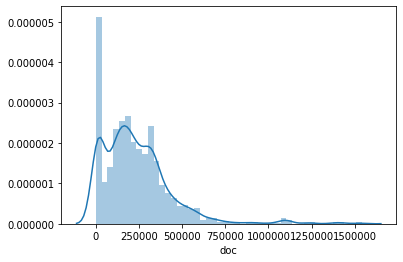

In [58]:
sns.distplot(result['doc'].str.len())

In [42]:
result['len'] = result['doc'].str.len()

In [61]:
big_df = result[result.len>=10000]

In [62]:
big_df .sort_values('len')

doc  \
E:/Users/atag3/Documents/Project_Data/decrypted...  \n\n\n\n\n\n In the opinion of Norton Rose Ful...   
E:/Users/atag3/Documents/Project_Data/decrypted...  \n  In the opinion of Hawkins Delafield & Wood...   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...  \n\n\nIn the opinion of Hawkins Delafield & Wo...   
E:/Users/atag3/Documents/Project_Data/decrypted...  \n\n In the opinion of Hawkins Delafield & Woo...   
E:/Users/atag3/Documents/Project_Data/decrypted...  NOTICE OF MATERIAL EVENT PURSUANT TO SEC RULE ...   
...                                                                                               ...   
E:/Users/atag3/Documents/Project_Data/decrypted...  NEW ISSUEŠBOOK-ENTRY ONLY Ratings: Moody™s: Aa...   
E:/Users/atag3/Documents/Project_Data/decrypted...  NEW ISSUEŠBOOK-ENTRY ONLY Ratings: Moody™s: Aa...   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...  OFFICIAL STATEMENT\n \nDated \nAugust 25\n, 20...   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...  OFFICIAL STATEMENT\n \nDated \nAugust 25\n, 20...   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...  OFFICIAL STATEMENT \nDated June 30, 2020\n NEW...   

                                                        len  
E:/Users/atag3/Documents/Project_Data/decrypted...    10072  
E:/Users/atag3/Documents/Project_Data/decrypted...    10096  
E:/Users/atag3/Documents/Project_Data/Pull2/dec...    10161  
E:/Users/atag3/Documents/Project_Data/decrypted...    10174  
E:/Users/atag3/Documents/Project_Data/decrypted...    10181  
...                                                     ...  
E:/Users/atag3/Documents/Project_Data/decrypted...  1422433  
E:/Users/atag3/Documents/Project_Data/decrypted...  1422433  
E:/Users/atag3/Documents/Project_Data/Pull2/dec...  1524795  
E:/Users/atag3/Documents/Project_Data/Pull2/dec...  1524795  
E:/Users/atag3/Documents/Project_Data/Pull2/dec...  1539632  

[2140 rows x 2 columns]

In [83]:
cities = pd.read_csv('https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv', sep="|")

In [84]:
states= cities['State full'].unique().tolist()

In [90]:
states = [x for x in states if pd.notnull(x)]

In [91]:
states = [x.lower() for x in states]

In [92]:
states= [words for segments in states for words in segments.split()]

In [93]:
states

['new',
 'york',
 'puerto',
 'rico',
 'virgin',
 'islands',
 'massachusetts',
 'rhode',
 'island',
 'new',
 'hampshire',
 'maine',
 'vermont',
 'connecticut',
 'new',
 'jersey',
 'us',
 'armed',
 'forces',
 'europe',
 'pennsylvania',
 'delaware',
 'washington,',
 'd.c.',
 'virginia',
 'maryland',
 'west',
 'virginia',
 'north',
 'carolina',
 'south',
 'carolina',
 'georgia',
 'florida',
 'alabama',
 'tennessee',
 'mississippi',
 'kentucky',
 'ohio',
 'indiana',
 'michigan',
 'iowa',
 'wisconsin',
 'minnesota',
 'south',
 'dakota',
 'north',
 'dakota',
 'montana',
 'illinois',
 'missouri',
 'kansas',
 'nebraska',
 'louisiana',
 'arkansas',
 'oklahoma',
 'texas',
 'colorado',
 'wyoming',
 'idaho',
 'utah',
 'arizona',
 'new',
 'mexico',
 'nevada',
 'california',
 'us',
 'armed',
 'forces',
 'pacific',
 'hawaii',
 'american',
 'samoa',
 'guam',
 'palau',
 'federated',
 'states',
 'of',
 'micronesia',
 'northern',
 'mariana',
 'islands',
 'marshall',
 'islands',
 'oregon',
 'washington',
 

In [94]:
# sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text 

# logging (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [95]:
specific_stops = ['texas',
                 'city',
                 'town',
                 'county',
                  'audit',
                 'bidder',
                 'township',
                  'counties',
                  'tax',
                  'state',
                  'bond',
                  'bonds',
                  'fort',
                  'bend',
                  'cities',
                  'towns'
                  'taxable',
                  'disbursments',
                  'bond',
                 'billion', 
                  'stateTMs', 
                  'thousands',
                  'proposition',
                  'village',  
                  'obetz', 
                  'villagetms',
                  'cityTMs', 
                  'countyTMs', 
                  'commonwealth',
                  'huntsville',
                  'inflows', 
                  'basic', 
                  'outflows', 
                  'fiduciary', 
                  'wide', 
                  'actuarial',
                  'return', 
                  'component',
                  'depreciation',
                  'oxford', 
                  'birmingham', 
                  'madison', 
                  'cityTMs',
                  'districtTMs', 
                  'harris', 
                  'houston',
                  'williamson', 
                  'rutherford',
                  'municipalityTMs',
                  'cont',
                  'borough',
                  'lexington', 
                  'fayette', 
                  'des', 
                  'san',
                  'antonio',
                  'francisco',
                  'bay',
                  'cpa',
                  'travis',
                  'austin'
                  'miami',
                  'opeb',
                   'msrb',
                  'quincy',
                  'ehlers', 
                  'wrs', 
                  'brady',
                  'quarles',
                  'evers', 
                  'btsc', 
                  'subdivisionTMs', 
                  'underwriter',
                  'registrar', 
                  'receipts', 
                  'dtcTMs', 
                  'cusip', 
                  'hereof',
                  'jefferson',
                  'townTMs',
                  'bam', 
                  'ict', 
                  'rict',
                  'trict',
                  'distr',
                  'distric', 
                  'istrict',
                  'comptroller',
                  'milwaukee',
                  'illion'
                  'chicago',
                  'agm',
                  'municipality',
                  'municipalityTMs',
                  'promissory',
                  'left',
                  'intentionally',
                  'blank',
                  'moines']+states 

In [397]:
#text.ENGLISH_STOP_WORDS.union(specific_stops)

tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                #ngram_range=(2,2),
                                stop_words = text.ENGLISH_STOP_WORDS.union(specific_stops),
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.80, #remove words in over 50% of dataset
                                min_df = .01)
dtm_tf = tf_vectorizer.fit_transform(doc_list)
print(dtm_tf.shape)

tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(doc_list)
print(dtm_tfidf.shape)

## Fit the Latent Dirichlet Allocation models

# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=15, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=15, random_state=0)
lda_tfidf.fit(dtm_tfidf)

(2341, 22034)


(2341, 22034)


LatentDirichletAllocation(n_components=15, random_state=0)

In [398]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.147872  0.020635       1        1  14.505157
12    -0.098793 -0.079455       2        1  12.011825
11     0.126584 -0.001602       3        1  10.911599
0      0.163172  0.008223       4        1   9.786534
10    -0.033507  0.062511       5        1   8.933145
8      0.122915  0.024854       6        1   8.105879
3     -0.066463 -0.010899       7        1   5.549017
7      0.083818 -0.034956       8        1   5.499663
6     -0.163881 -0.199279       9        1   5.352169
2      0.038919 -0.006562      10        1   4.240795
5      0.097626 -0.076673      11        1   3.438902
13    -0.031701  0.027304      12        1   3.418347
14     0.037235  0.000605      13        1   3.176961
9     -0.150536  0.200734      14        1   2.536980
1      0.022484  0.064560      15        1   2.533029, topic_info=                 Term           Freq          Total Category  logprob  loglift
272        activities   91116.000000   91116.000000  Default  30.0000  30.0000
15027        position   97069.000000   97069.000000  Default  29.0000  29.0000
14598         pension  113766.000000  113766.000000  Default  28.0000  28.0000
17890       september   40193.000000   40193.000000  Default  27.0000  27.0000
621               aid   37138.000000   37138.000000  Default  26.0000  26.0000
...               ...            ...            ...      ...      ...      ...
1255    approximately    1461.721929   29149.619356  Topic15  -5.7942   0.6829
15497         program    1572.964745   42002.777956  Topic15  -5.7209   0.3910
1300             area    1372.475128   22668.029585  Topic15  -5.8572   0.8714
15111           power    1188.044345   14033.954000  Topic15  -6.0015   1.2066
20336  transportation    1160.486721   14653.640744  Topic15  -6.0250   1.1399

[1376 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
0          1  0.267414        TMs
0          2  0.055634        TMs
0          3  0.125726        TMs
0          4  0.047653        TMs
0          5  0.005436        TMs
...      ...       ...        ...
21931      8  0.053678  yearcosts
21975      6  0.985669        yen
22001      5  0.991193    yorkers
22015      6  0.987642       yuan
22019      6  0.986879    zealand

[7634 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 13, 12, 1, 11, 9, 4, 8, 7, 3, 6, 14, 15, 10, 2])

In [490]:
#add known esg docs to list
doc_list = big_df['doc']

In [491]:
doc_list = doc_list.append(go_text)

In [484]:
from nltk.stem.snowball import SnowballStemmer
stemmer = PorterStemmer()
stemm_list= doc_list.apply(lambda x: [stemmer.stem(y) for y in x.split(' ')])

In [496]:
doc_frame = pd.DataFrame(doc_list)
doc_frame.columns=['doc_text']
doc_frame['stem_text'] = stemm_list
doc_frame['stem_text'] =[' '.join(map(str, l)) for l in doc_frame['stem_text']]

In [658]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\atag3\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [659]:
vectorizer = CountVectorizer(strip_accents = 'unicode',
                                tokenizer=LemmaTokenizer(),
                                #ngram_range=(1,2),
                                stop_words = text.ENGLISH_STOP_WORDS.union(specific_stops),
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.60, #remove words in over 50% of dataset
                                min_df = 10)

doc_word = vectorizer.fit_transform(doc_frame['doc_text'])

tfidf_vectorizer = TfidfVectorizer(strip_accents = 'unicode',
                                #ngram_range=(1,2),
                                tokenizer=LemmaTokenizer(),
                                stop_words = text.ENGLISH_STOP_WORDS.union(specific_stops),
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.60, #remove words in over 50% of dataset
                                min_df = 10)

doc_tf_idf = tfidf_vectorizer.fit_transform(doc_frame['doc_text'])


In [632]:
pd.DataFrame(doc_tf_idf.toarray(), columns=vectorizer.get_feature_names())

TMs  TMsfl  aTM  aaTM       aaa  aaaTM      aaaa  aaaaaa  aaaf  \
0     0.000000    0.0  0.0   0.0  0.000000    0.0  0.000000     0.0   0.0   
1     0.004742    0.0  0.0   0.0  0.000000    0.0  0.000000     0.0   0.0   
2     0.014106    0.0  0.0   0.0  0.006329    0.0  0.000000     0.0   0.0   
3     0.000000    0.0  0.0   0.0  0.000000    0.0  0.000000     0.0   0.0   
4     0.000000    0.0  0.0   0.0  0.094971    0.0  0.000000     0.0   0.0   
...        ...    ...  ...   ...       ...    ...       ...     ...   ...   
2336  0.199589    0.0  0.0   0.0  0.000000    0.0  0.008653     0.0   0.0   
2337  0.006709    0.0  0.0   0.0  0.004515    0.0  0.000000     0.0   0.0   
2338  0.000000    0.0  0.0   0.0  0.011449    0.0  0.000000     0.0   0.0   
2339  0.000000    0.0  0.0   0.0  0.014174    0.0  0.000000     0.0   0.0   
2340  0.000000    0.0  0.0   0.0  0.000000    0.0  0.000000     0.0   0.0   

      aaam  ...  zloty  zombie  zon      zone  zoned  zones  zoning       zoo  \
0      0.0  ...    0.0     0.0  0.0  0.000000    0.0    0.0     0.0  0.000000   
1      0.0  ...    0.0     0.0  0.0  0.000000    0.0    0.0     0.0  0.000000   
2      0.0  ...    0.0     0.0  0.0  0.010265    0.0    0.0     0.0  0.000000   
3      0.0  ...    0.0     0.0  0.0  0.000000    0.0    0.0     0.0  0.000000   
4      0.0  ...    0.0     0.0  0.0  0.000000    0.0    0.0     0.0  0.000000   
...    ...  ...    ...     ...  ...       ...    ...    ...     ...       ...   
2336   0.0  ...    0.0     0.0  0.0  0.003543    0.0    0.0     0.0  0.000000   
2337   0.0  ...    0.0     0.0  0.0  0.000000    0.0    0.0     0.0  0.000000   
2338   0.0  ...    0.0     0.0  0.0  0.007428    0.0    0.0     0.0  0.021984   
2339   0.0  ...    0.0     0.0  0.0  0.003831    0.0    0.0     0.0  0.000000   
2340   0.0  ...    0.0     0.0  0.0  0.000000    0.0    0.0     0.0  0.000000   

      zoological  zoos  
0            0.0   0.0  
1            0.0   0.0  
2            0.0   0.0  
3            0.0   0.0  
4            0.0   0.0  
...          ...   ...  
2336         0.0   0.0  
2337         0.0   0.0  
2338         0.0   0.0  
2339         0.0   0.0  
2340         0.0   0.0  

[2341 rows x 35928 columns]

In [660]:

#TF_IDF version of NMF
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

from sklearn.decomposition import NMF
nmf_model = NMF(9, max_iter = 500)
doc_topic = nmf_model.fit_transform(doc_tf_idf)

topic_word = pd.DataFrame(nmf_model.components_.round(9),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9"],
             columns = vectorizer.get_feature_names())


display_topics(nmf_model, vectorizer.get_feature_names(), 15)

H = pd.DataFrame(doc_topic.round(9),
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9"],
                 index=doc_list.index)
H




Topic  0
central, trs, star, boces, covid, foundation, pupil, tier, 201, district-wide, stress, voter, teacher, -19, ł

Topic  1
!, ?, <, >, #, @, +, =, ł, /, `, _, {, eav, j

Topic  2
developer, appraisal, agent/registrar, unlimited, homestead, drainage, wastewater, tceq, appraised, ozone, acre, hgb, groundwater, flood, fithe

Topic  3
201, council, 2020b, 2020a, outflow, ordinance, dissemination, proprietary, n.j.s.a, measurement, successful, business-type, ipers, -term, bid

Topic  4
–, successful, ’, bid, excise, preservation, boston, overlay, vehicle, marshfield, motor, selectman, surcharge, government-wide, postemployment

Topic  5
--, ’, government-wide, business-type, statementsas, outflow, thousand, 2019note, measurement, adam, proprietary, •, ł, nonmajor, otal

Topic  6
newyork, ifmaterial, 100.00, june30, n/a, equalizedvalue, concludedonfollowingpage, fiscalyearended, schooldistrict, balancejuly1, townof, 00000balancejune30, theschooldistrict, buildingaidestimate, bondantic

component_1  component_2  \
E:/Users/atag3/Documents/Project_Data/decrypted...     0.005274     0.003670   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.004473     0.003316   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.001997   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000560   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.192378   
...                                                         ...          ...   
CT_windham_unknown_decrypt.pdf                         0.000000     0.322452   
MA_Lynn_unknown_decrypt.pdf                            0.000000     0.000000   
MS_GO_esg_decrypt.pdf                                  0.004854     0.000000   
OR_GO_esg_decrypt.pdf                                  0.002354     0.000000   
WI_Lannon_unknown_decrypt.pdf                          0.000000     0.000120   

                                                    component_3  component_4  \
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.011218   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.097491     0.003745   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.230193     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000654     0.002243   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000000   
...                                                         ...          ...   
CT_windham_unknown_decrypt.pdf                         0.000000     0.002514   
MA_Lynn_unknown_decrypt.pdf                            0.005249     0.093613   
MS_GO_esg_decrypt.pdf                                  0.005798     0.063894   
OR_GO_esg_decrypt.pdf                                  0.003257     0.000000   
WI_Lannon_unknown_decrypt.pdf                          0.000000     0.000000   

                                                    component_5  component_6  \
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.002375     0.023662   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.004364     0.017639   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000000   
...                                                         ...          ...   
CT_windham_unknown_decrypt.pdf                         0.008887     0.000000   
MA_Lynn_unknown_decrypt.pdf                            0.059484     0.000000   
MS_GO_esg_decrypt.pdf                                  0.001273     0.011223   
OR_GO_esg_decrypt.pdf                                  0.098331     0.073391   
WI_Lannon_unknown_decrypt.pdf                          0.000000     0.004748   

                                                    component_7  component_8  \
E:/Users/atag3/Documents/Project_Data/decrypted...     0.002973     0.003887   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.006787     0.002960   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.003119     0.001097   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000255     0.001503   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.311919   
...                                                         ...          ...   
CT_windham_unknown_decrypt.pdf                         0.000000     0.000000   
MA_Lynn_unknown_decrypt.pdf                            0.000000     0.000000   
MS_GO_esg_decrypt.pdf                                  0.000616     0.012947   
OR_GO_esg_decrypt.pdf                                  0.000000     0.033208   
WI_Lannon_unknown_decrypt.pdf                          0.000000     0.000616   

                                                    component_9  
E:/Users/atag3/Documents/Project_Data/decrypted...     0.004952  
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000  
E:/Users/a

In [661]:
# word version of NMF
nmf_model = NMF(9, max_iter = 500)
doc_topic = nmf_model.fit_transform(doc_word)

topic_word = pd.DataFrame(nmf_model.components_.round(9),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9"],
             columns = vectorizer.get_feature_names())


display_topics(nmf_model, vectorizer.get_feature_names(), 15)

H = pd.DataFrame(doc_topic.round(9),
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9"],
                 index=doc_list.index)
H



Topic  0
!, /, 61, 01, .6, 68, `, -0, /8, =, +1, +., +, /0, \

Topic  1
--, thousand, /, dollar, encumbrance, +, 61, business-type, ’, outflow, 68, parking, ?, recreation, council

Topic  2
>, ?, @, <, #, =, !, k=, +, =s, `, \, j, fc, k

Topic  3
#, =, /, +, -1, k, m0, //, q, z, !, :0, ==, -., =1

Topic  4
ˆ, ˇ, #, !, +, ˇˆ, <, ?, ˆˆ, ˇˇ, ˆˇ, >, *+, ˇˇˆ, ˆˆˆ

Topic  5
<, ?, >, /, +, #, `, 3-, -0, *+, ˇ, *., _, /., 3/

Topic  6
@, ?, >, <, `, //, j/, 5/, 56, -5, ˇˆ, 5n, 1c, 49, gh

Topic  7
–, ’, outflow, thousand, •, measurement, council, business-type, retiree, 201, enterprise, housing, variable, university, proprietary

Topic  8
0.00, fr, charter, student, lee, outflow, lease-purchase, outlay, 201, accumulated, food, technology, grade, ?, plant


component_1  component_2  \
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.043878   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.099163   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000003   
E:/Users/atag3/Documents/Project_Data/decrypted...    20.703896     0.299298   
...                                                         ...          ...   
CT_windham_unknown_decrypt.pdf                         5.859322     0.000000   
MA_Lynn_unknown_decrypt.pdf                            0.000000     0.000000   
MS_GO_esg_decrypt.pdf                                  0.000000     0.007105   
OR_GO_esg_decrypt.pdf                                  0.000000     0.211947   
WI_Lannon_unknown_decrypt.pdf                          0.000000     0.006425   

                                                    component_3  component_4  \
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.018041     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.037768     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     7.007310    26.432365   
...                                                         ...          ...   
CT_windham_unknown_decrypt.pdf                         1.956462     0.045830   
MA_Lynn_unknown_decrypt.pdf                            0.000000     0.000000   
MS_GO_esg_decrypt.pdf                                  0.000000     0.000000   
OR_GO_esg_decrypt.pdf                                  0.000000     0.016062   
WI_Lannon_unknown_decrypt.pdf                          0.002252     0.017528   

                                                    component_5  component_6  \
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.002506     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.007334     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...    40.326516     6.028481   
...                                                         ...          ...   
CT_windham_unknown_decrypt.pdf                         0.141130     0.000000   
MA_Lynn_unknown_decrypt.pdf                            0.000000     0.000000   
MS_GO_esg_decrypt.pdf                                  0.105710     0.000000   
OR_GO_esg_decrypt.pdf                                  0.000000     0.000000   
WI_Lannon_unknown_decrypt.pdf                          0.000000     0.000000   

                                                    component_7  component_8  \
E:/Users/atag3/Documents/Project_Data/decrypted...     0.020871     0.005114   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.086265     0.335200   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.138704     1.393039   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.010436     0.004611   
E:/Users/atag3/Documents/Project_Data/decrypted...    13.254177     0.000000   
...                                                         ...          ...   
CT_windham_unknown_decrypt.pdf                         0.000000     1.152791   
MA_Lynn_unknown_decrypt.pdf                            0.039670     0.999498   
MS_GO_esg_decrypt.pdf                                  0.010003     2.686001   
OR_GO_esg_decrypt.pdf                                  0.000000     2.379603   
WI_Lannon_unknown_decrypt.pdf                          0.000000     0.217021   

                                                    component_9  
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000  
E:/Users/atag3/Documents/Project_Data/decrypted...     0.001909  
E:/Users/a

In [400]:
H.sort_values('component_9', ascending=False).head(30)

component_1  component_2  \
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.018183     0.000000   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     2.312384     0.000000   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.179259     0.696871   
E:/Users/atag3/Documents/Project_Data/decrypted...     1.092794     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     2.013607     0.592193   
E:/Users/atag3/Documents/Project_Data/decrypted...     2.013607     0.592193   
E:/Users/atag3/Documents/Project_Data/decrypted...     2.048967     0.901277   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.483732   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.000000     0.566795   
E:/Users/atag3/Documents/Project_Data/decrypted...     1.674319     0.211568   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.612679   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.346300   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.430882     0.000000   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.430882     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.007191     0.203720   
E:/Users/atag3/Documents/Project_Data/decrypted...     1.917144     0.145940   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.271619   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     1.087038     0.642695   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     2.055507     0.821258   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.065753   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.078609     0.006250   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.078609     0.006250   
E:/Users/atag3/Documents/Project_Data/decrypted...     1.768838     0.794217   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.347818   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.185928     0.667485   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.652442     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.652442     0.000000   

                                                    component_3  component_4  \
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.223034     0.391415   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.693562     0.417607   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.347081     0.582484   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     1.869104     0.300519   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.050190     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.331318     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.331318     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.000000   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.068409     0.003875   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.495234     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.021421     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.112117   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.181282     0.000000   
E:/Users/atag3/Documents/Project_Data/Pull2/dec...     0.181282     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.347493     0.122795   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.516643     0.000000   
E:/Users/atag3/Documents/Project_Data/decrypted...     0.000000     0.088936   
E:/Users/atag3/Documents/Project_Data/Pull2/dec... 

In [231]:
# Import other packages for examples
import pandas as pd
import numpy as np
import scipy.sparse as ss

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [401]:
words = list(np.asarray(vectorizer.get_feature_names()))

In [279]:
words = list(np.asarray(vectorizer.get_feature_names()))

topic_model = ct.Corex(n_hidden=6, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=doc_list)

In [281]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: secu,rect,onal,asse,operty,paym,prin,rmation,paymen,rvice
1: equalizing,ppb,tceq,nonattainment,sticker,loses,tpdes,ozone,stringent,timberland
2: expendable,distinguish,annuitant,noncurrent,abatements,healthy,domestic,vendors,columns,element
3: abuses,impairing,fsms,centum,score,syracuse,smallest,inclusions,stress,objectively
4: lost,conducting,master,federally,associations,surviving,commissions,placement,pollution,tangible
5: inure,relations,package,workforce,appointing,hospitals,product,send,subsection,thirds


In [282]:
topic_model = ct.Corex(n_hidden=8, words=words,
                       max_iter=200, verbose=False, seed=1)

topic_model.fit(doc_word, words=words, docs=doc_list, 
                anchors=[['housing','mortgage','affordable'], 
                         ['infrastructure','roads','transit'], 
                         ['school','college','training','jobs','education'], 
                         ['water','sewer','wastewater'],
                         ['community','development','improvement'],
                         ['retire','pension','retirees'],
                        ['refinance','refund','']], anchor_strength=5)

# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: affordable,formulas,extraordinary,contributory,withhold,strong,student,appropriating,indicators,incentive
1: expendable,distinguish,annuitant,noncurrent,columns,element,healthy,hierarchy,vendors,constrained
2: equalizing,ppb,tceq,nonattainment,sticker,loses,tpdes,ozone,stringent,timberland
3: taxed,underwriterTMs,fiannual,caption,commissions,belief,lost,prevail,stabilizing,join
4: suc,tate,req,distr,uch,stateme,ict,istrict,pect,thi
5: priorities,partnerships,rooms,submitting,preservation,passenger,rail,subsidies,leisure,mass
6: abuses,centum,impairing,fsms,syracuse,score,smallest,inclusions,stress,derives
7: rect,secu,onal,asse,operty,paym,rmation,prin,rvice,paymen


In [283]:
# Note, instead of using .predict(doc_word), you can also call topic_model.labels
predictions = pd.DataFrame(topic_model.p_y_given_x, columns=['topic'+str(i) for i in range(8)], index=doc_list.index)
predictions.head(20)


topic0    topic1  \
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.999999  0.999999   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.999999  0.999999   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.999999   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.999999   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.999999   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.999999  0.999999   

                                                      topic2    topic3  \
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.999999  0.999999   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.999999   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.999999  0.999999   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.999999   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.999999  0.999999   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.999999   

                                                      topic4    topic5  \
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.999999  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.928613   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.000001  0.000001   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.999999  0.999999   
E:/Users/atag3/Documents/Project_Data/decrypted...  0.00

In [274]:
topic_model.p_y_given_x

array([[1.00000e-06, 1.00000e-06, 1.00000e-06, ..., 1.00000e-06,
        1.00000e-06, 1.00000e-06],
       [1.00000e-06, 1.00000e-06, 1.00000e-06, ..., 9.99999e-01,
        1.00000e-06, 1.00000e-06],
       [9.99999e-01, 9.99999e-01, 9.99999e-01, ..., 9.99999e-01,
        9.99999e-01, 9.99999e-01],
       ...,
       [9.99999e-01, 9.99999e-01, 9.99999e-01, ..., 9.99999e-01,
        9.99999e-01, 9.99999e-01],
       [9.99999e-01, 9.99999e-01, 9.99999e-01, ..., 9.99999e-01,
        9.99999e-01, 9.99999e-01],
       [1.00000e-06, 1.00000e-06, 1.00000e-06, ..., 1.00000e-06,
        1.00000e-06, 9.99999e-01]])

In [306]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


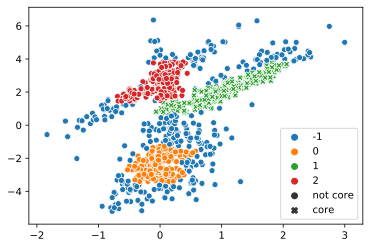

In [307]:
# Other Clustering Algorithms
#We'll take a look at a few clustering algorithms, to see how they compare for an arbitrary dataset. We'll also look into evaluating these algorithms using the silhouette score.

%load_ext autoreload
%autoreload 2

#from clustering_util import silhouette_plots, plot_dendrogram
from sklearn.cluster import DBSCAN, MeanShift, estimate_bandwidth, KMeans, AgglomerativeClustering

from sklearn.datasets import make_classification
from time import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

n = 1000

X, y = make_classification(n_samples=n, 
                           n_classes=3, 
                           n_informative=3, 
                           n_redundant=4, 
                           class_sep=2.4,
                           random_state=2**24)

X = X[:, :2]

sns.scatterplot(X[:, 0], X[:, 1]);

## DBSCAN

db = DBSCAN(eps=0.2, min_samples=12).fit(X)

point_type = np.where(np.isin(db.labels_, db.core_sample_indices_),
                      'core',
                      'not core')

sns.scatterplot(X[:, 0], X[:, 1],
                hue=db.labels_,
                style=point_type,
                palette='tab10');

param_grid = {'eps': [0.2], 
              'min_samples': [8, 10, 12, 16]}

#silhouette_plots(X, DBSCAN, param_grid, report_on='min_samples')

In [640]:
## Let's do some PCA!
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix

# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=2)
svd.fit_transform(doc_tf_idf)

print(svd.explained_variance_ratio_)

[0.02031433 0.0387853 ]


In [644]:
## Let's do some PCA!
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix

# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=2)
pca.fit_transform(doc_tf_idf)

print(pca.explained_variance_ratio_)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

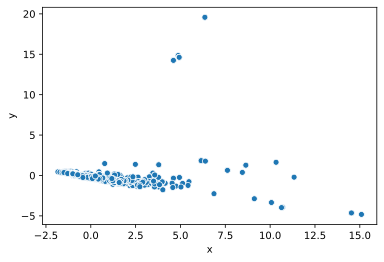

In [446]:
sns.scatterplot(x=chrt_dat[0],y=chrt_dat[1'],hue=H.idxmax(axis=1).tolist())

In [652]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(chrt_dat, x='x', y="y",color=H.idxmax(axis=1).tolist(), hover_name=doc_list.index)
fig.show()

Index(['E:/Users/atag3/Documents/Project_Data/decrypted/0748F094426E920DD051DAAA1ACFC5C7.pdf',
       'E:/Users/atag3/Documents/Project_Data/decrypted/0B1336EEF2B2C02C9CE79FF69FC86A24.pdf',
       'E:/Users/atag3/Documents/Project_Data/decrypted/134C6514F941CBC097039DE6F1D06B1C.pdf',
       'E:/Users/atag3/Documents/Project_Data/decrypted/1DAD79741A1464F886D586190271891B.pdf',
       'E:/Users/atag3/Documents/Project_Data/decrypted/1F68BD7B764E0EF210B4E25D97BD0CEC.pdf',
       'E:/Users/atag3/Documents/Project_Data/decrypted/21139D83323A46CD14D1242E3017B168.pdf',
       'E:/Users/atag3/Documents/Project_Data/decrypted/21CD6E194A6E71353139A1EFFF53CB6C.pdf',
       'E:/Users/atag3/Documents/Project_Data/decrypted/298ECEC744A6403860E9FBA8BDC9A35C.pdf',
       'E:/Users/atag3/Documents/Project_Data/decrypted/39AF34EC89F7B6E03E013F6D6875B29B.pdf',
       'E:/Users/atag3/Documents/Project_Data/decrypted/3B19A20C3930E43F8D6BBE65C55160FD.pdf',
       ...
       'E:/Users/atag3/Documents/Projec

In [651]:
chrt_dat.columns=['x','y']

In [650]:
chrt_dat = pd.DataFrame(svd.fit_transform(doc_tf_idf))

In [357]:
nmf_model.fit(doc_word)

NMF(n_components=10)

['component_6',
 'component_2',
 'component_2',
 'component_6',
 'component_6',
 'component_7',
 'component_3',
 'component_2',
 'component_2',
 'component_6',
 'component_7',
 'component_2',
 'component_2',
 'component_2',
 'component_1',
 'component_1',
 'component_1',
 'component_2',
 'component_13',
 'component_7',
 'component_9',
 'component_1',
 'component_6',
 'component_11',
 'component_7',
 'component_3',
 'component_3',
 'component_2',
 'component_3',
 'component_3',
 'component_8',
 'component_2',
 'component_1',
 'component_13',
 'component_2',
 'component_2',
 'component_1',
 'component_2',
 'component_6',
 'component_2',
 'component_9',
 'component_9',
 'component_12',
 'component_9',
 'component_6',
 'component_9',
 'component_2',
 'component_9',
 'component_3',
 'component_8',
 'component_3',
 'component_9',
 'component_13',
 'component_2',
 'component_9',
 'component_3',
 'component_3',
 'component_6',
 'component_6',
 'component_6',
 'component_1',
 'component_2',
 'c

# Try and just do by state use NY to start since we have the most.

In [523]:
big_df['ID'] = [x.split('/')[-1].replace('.pdf','') for x in big_df.index.tolist()]

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [ipykernel_launcher.py:1]


In [530]:
big_df = big_df.merge(doc_table,on='ID', how='left')

In [532]:
ny_df = big_df[big_df.State=='NY'] 

In [601]:
#text.ENGLISH_STOP_WORDS.union(specific_stops)

tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                #ngram_range=(2,2),
                                stop_words = text.ENGLISH_STOP_WORDS.union(specific_stops),
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.80, #remove words in over 50% of dataset
                                min_df = .01)
dtm_tf = tf_vectorizer.fit_transform(ny_df['doc'])
print(dtm_tf.shape)

tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(ny_df['doc'])
print(dtm_tfidf.shape)

## Fit the Latent Dirichlet Allocation models

# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=15, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=15, random_state=0)
lda_tfidf.fit(dtm_tfidf)

(389, 19260)


(389, 19260)


LatentDirichletAllocation(n_components=15, random_state=0)

In [602]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.139370 -0.041355       1        1  25.240094
10     0.162508 -0.073619       2        1  22.634541
1      0.131527 -0.042290       3        1  14.080312
7      0.139430 -0.045214       4        1   9.841561
2      0.105246  0.074944       5        1   9.127590
3      0.134325 -0.017224       6        1   7.529041
12     0.149025 -0.077587       7        1   3.535081
5      0.097889  0.086989       8        1   2.778514
11    -0.371836 -0.189097       9        1   2.143406
6      0.117259 -0.019356      10        1   1.486168
14    -0.392185 -0.134393      11        1   0.757624
0      0.044507 -0.062569      12        1   0.552713
8     -0.000420  0.142917      13        1   0.291754
9     -0.228323  0.198927      14        1   0.000800
4     -0.228323  0.198927      15        1   0.000800, topic_info=                  Term          Freq         Total Category  logprob  loglift
1918           balance  14734.000000  14734.000000  Default  30.0000  30.0000
6326      expenditures  13469.000000  13469.000000  Default  29.0000  29.0000
5632            ending   5243.000000   5243.000000  Default  28.0000  28.0000
1563            assets  12916.000000  12916.000000  Default  27.0000  27.0000
4359          deferred   7636.000000   7636.000000  Default  26.0000  26.0000
...                ...           ...           ...      ...      ...      ...
11692           ofreal      0.001301      8.971938  Topic15  -9.8658   2.8968
2600      cancellation      0.001301     13.700710  Topic15  -9.8658   2.4734
2631   capitalprojects      0.001301     15.426754  Topic15  -9.8658   2.3548
14487      reputations      0.001301      8.650686  Topic15  -9.8658   2.9332
14404          reoffer      0.001301      9.594069  Topic15  -9.8658   2.8297

[1263 rows x 6 columns], token_table=       Topic      Freq                                 Term
term                                                       
93         2  0.409378                          accompanies
93         5  0.409378                          accompanies
111        9  0.986765  accordingtothefouryearfinancialplan
133        1  0.231861                             accounts
133        2  0.293691                             accounts
...      ...       ...                                  ...
19215     12  0.000162                                years
19215     13  0.001778                                years
19255      1  0.894899                                 zing
19258      7  0.877132                                zones
19258     10  0.097459                                zones

[4121 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 11, 2, 8, 3, 4, 13, 6, 12, 7, 15, 1, 9, 10, 5])

In [78]:
specific_stops = ['texas',
                 'city',
                 'town',
                 'county',
                  'audit',
                 'bidder',
                 'township',
                  'counties',
                  'tax',
                  'state',
                  'bond',
                  'bonds',
                  'fort',
                  'bend',
                  'cities',
                  'towns'
                  'taxable',
                  'disbursments',
                  'bond',
                 'billion', 
                  'stateTMs', 
                  'thousands',
                  'proposition',
                  'village',  
                  'obetz', 
                  'villagetms',
                  'cityTMs', 
                  'countyTMs', 
                  'commonwealth',
                  'huntsville', 
                  'oxford', 
                  'birmingham', 
                  'madison', 
                  'cityTMs',
                  'districtTMs', 
                  'harris', 
                  'houston',
                  'williamson', 
                  'rutherford',
                  'municipalityTMs',
                  'cont',
                  'borough',
                  'credit',
                  'finance',
                  'annual',
                  'lexington', 
                  'fayette',
                  'shall',
                  'issuer',
                  'respect',
                  'otal',
                  'des', 
                  'san',
                  'antonio',
                  'francisco',
                  'bay',
                  'cpa',
                  'travis',
                  'austin'
                  'miami',
                  'ion',
                  'dtc',
                  'appendix',
                  'opeb',
                   'msrb',
                  'quincy',
                  'jefferson',
                  'townTMs',
                  'bam', 
                  'january',
                  'february',
                  'march',
                  'april',
                  'may',
                  'june',
                  'july',
                  'august',
                  'september',
                  'october',
                  'governmental',
                  'ent',
                  'ing',
                  'owego',
                  'position',
                  'november',
                  'december',
                  'ict', 
                  'rict',
                  'trict',
                  'distr',
                  'distric', 
                  'istrict', 
                  'milwaukee',
                  'fund',
                  'fiscal',
                  'date',
                  'funds',
                  'illion'
                  'chicago',
                  'agm',
                  'municipality',
                  'municipalityTMs',
                  'promissory',
                  'left',
                  'intentionally',
                  'blank',
                  'moines']+states 

NameError: name 'states' is not defined

In [596]:
vectorizer = CountVectorizer(strip_accents = 'unicode',
                                ngram_range=(1,2),
                                stop_words = text.ENGLISH_STOP_WORDS.union(specific_stops),
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.7, #remove words in over 50% of dataset
                                min_df = 10)

doc_word = vectorizer.fit_transform(ny_df['doc'])
pd.DataFrame(doc_word.toarray(), columns=vectorizer.get_feature_names())


TMs  \
0      0   
1      0   
2     28   
3      0   
4      0   
..   ...   
384    0   
385    0   
386    0   
387    0   
388    0   

     TMs consentingorvotingrightstothosedirectparticipantstowhoseaccountsnotesarecreditedontherecorddate  \
0                                                    0                                                     
1                                                    0                                                     
2                                                    0                                                     
3                                                    0                                                     
4                                                    0                                                     
..                                                 ...                                                     
384                                                  0                                                     
385                                                  0                                                     
386                                                  0                                                     
387                                                  0                                                     
388                                                  0                                                     

     TMs financial  aaa  abandoned  abated  abatement  abatement agreements  \
0                0    0          0       0          0                     0   
1                0    0          0       0          1                     0   
2                1    0          0       1          0                     0   
3                0    0          0       0          1                     0   
4                0    0          0       0          0                     0   
..             ...  ...        ...     ...        ...                   ...   
384              0    0          0       0          2                     2   
385              0    0          2       2          7                     0   
386              0    0          2       2          7                     0   
387              0    0          0       0          0                     0   
388              0    0          0       0          0                     0   

     abatement program  abatement programs  ...  ystems  zation  zed  \
0                    0                   0  ...       0       0    0   
1                    0                   0  ...       0       0    1   
2                    0                   0  ...       0       0    3   
3                    0                   1  ...       0       0    0   
4                    0                   0  ...       0       0    0   
..                 ...                 ...  ...     ...     ...  ...   
384                  0                   0  ...       0       0    0   
385                  2                   2  ...       0       0    0   
386                  2                   2  ...       0       0    0   
387                  0                   0  ...       0       0    0   
388                  0                   0  ...       0       0    0   

     zed official  zero  zero subseque  zero subsequent  zing  zone  zoning  
0               0     0              0                0     0     0       3  
1               1     2              0                1     0     0       0  
2               0     0              0                0     0     0       2  
3               0     0              0                0     0     0       0  
4               0     0              0                0     0     0       0  
..            ...   ...            ...              ...   ...   ...     ...  
384             0     1              0                1     0     0       0  
385             0     0              0                0     0     2       1  
386             0     0              0         

In [598]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

from sklearn.decomposition import NMF
nmf_model = NMF(3, max_iter = 500)
doc_topic = nmf_model.fit_transform(doc_word)

topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3"],
             columns = vectorizer.get_feature_names())


display_topics(nmf_model, vectorizer.get_feature_names(), 10)

H = pd.DataFrame(doc_topic.round(3),
             columns = ["component_1","component_2","component_3"],
                 index=ny_df['Issuer Name'])
H




Topic  0
central, central school, resources, retirement, activities, ended, reported, deferred, year ended, education

Topic  1
official statement, school districts, participants, education, provide, million, increase, provisions, set, following

Topic  2
resources, activities, deferred, changes, program, reported, ended, plan, used, water


component_1  component_2  \
Issuer Name                                                                    
ROTTERDAM N Y                                             0.000        0.000   
FRANKLIN N Y CENT SCH DIST                                6.044        3.753   
ELMIRA CITY N Y                                           0.123        0.000   
GUILDERLAND N Y CENT SCH DIST                             5.205        0.000   
MONROE N Y                                                0.000        0.006   
...                                                         ...          ...   
BROCTON CENTRAL SCHOOL DISTRICT CHAUTAUQUA COUN...        8.780        3.375   
TOWN OF OYSTER BAY, NASSAU COUNTY, NEW YORK               0.000        0.000   
TOWN OF OYSTER BAY, NEW YORK                              0.000        0.000   
CITY OF MIDDLETOWN ORANGE COUNTY, NEW YORK                0.000        0.000   
CITY OF KINGSTON ULSTER COUNTY, NEW YORK                  0.000        0.000   

                                                    component_3  
Issuer Name                                                      
ROTTERDAM N Y                                             4.528  
FRANKLIN N Y CENT SCH DIST                                0.000  
ELMIRA CITY N Y                                           6.661  
GUILDERLAND N Y CENT SCH DIST                             0.209  
MONROE N Y                                                0.189  
...                                                         ...  
BROCTON CENTRAL SCHOOL DISTRICT CHAUTAUQUA COUN...        0.025  
TOWN OF OYSTER BAY, NASSAU COUNTY, NEW YORK              17.678  
TOWN OF OYSTER BAY, NEW YORK                             17.678  
CITY OF MIDDLETOWN ORANGE COUNTY, NEW YORK                0.000  
CITY OF KINGSTON ULSTER COUNTY, NEW YORK                  2.888  

[389 rows x 3 columns]

In [584]:
H.sort_values('component_4', ascending=False).head(30)

component_1  component_2  \
Issuer Name                                                                    
CITY SCHOOL DISTRICT OF THE CITY OF ITHACA             0.255261     4.323061   
GREENE CENTRAL SCHOOL DISTRICT BROOME, CHENANGO...     1.661510     3.447246   
SOUTHERN CAYUGA CENTRAL SCHOOL DISTRICT CAYUGA ...     1.357209     4.474362   
NEWARK VALLEY CENTRAL SCHOOL DISTRICT, TIOGA, T...     2.280372     3.583005   
CITY OF AUBURN CAYUGA COUNTY, NEW YORK                 0.000000     0.000000   
OWEGO APALACHIN CENTRAL SCHOOL DISTRICT TIOGA C...     2.732718     3.466453   
OWEGO APALACHIN CENTRAL SCHOOL DISTRICT TIOGA C...     2.732718     3.466453   
TIOGA CENTRAL SCHOOL DISTRICT, TIOGA COUNTY, NE...     2.900601     3.199780   
CHENANGO FORKS CENTRAL SCHOOL DISTRICT, NEW YORK       2.528898     3.410951   
ITHACA CITY NEW YORK                                   0.000000     0.375831   
CHENANGO VALLEY CENTRAL SCHOOL DISTRICT BROOME ...     3.129611     4.277409   
OWEGO APALACHIN CENTRAL SCHOOL DISTRICT NEW YORK       2.618973     3.608586   
OTSELIC VALLEY CENTRAL SCHOOL DISTRICT, NEW YORK       2.080568     3.813151   
SANDY CREEK CENTRAL SCHOOL DISTRICT, OSWEGO, LE...     2.176634     4.029883   
OXFORD ACADEMY AND CENTRAL SCHOOL DISTRICT NEW ...     2.361832     3.884196   
CITY SCHOOL DISTRICT OF THE CITY OF LITTLE FALL...     0.499881     3.740764   
LANSING CENTRAL SCHOOL DISTRICT, NEW YORK              2.117114     4.645291   
WATKINS GLEN CENTRAL SCHOOL DISTRICT, CHEMUNG A...     1.296199     2.046738   
COUNTY OF OTSEGO, NEW YORK                             0.000000     0.489381   
ELMIRA CITY N Y                                        0.000000     0.000000   
WHITNEY POINT CENTRAL SHOOL DISTRICT NEW YORK          3.436678     3.240595   
TOWN OF MAMARONECK, WESTCHESTER COUNTY NEW YORK        0.000000     0.128483   
MAINE-ENDWELL CENTRAL SCHOOL DISTRICT, NEW YORK        2.001726     4.664016   
WEST GENESEE CENTRAL SCHOOL DISTRICT, NEW YORK         3.709952     4.181537   
WEST GENESEE CENTRAL SCHOOL DISTRICT, NEW YORK         3.709952     4.181537   
BERLIN CENTRAL SCHOOL DISTRICT, NEW YORK               2.830885     3.909758   
NORTH SYRACUSE CENTRAL SCHOOL DISTRICT, ONONDAG...     0.041537     3.964803   
VESTAL CENTRAL SCHOOL DISTRICT, BROOME AND TIOG...     4.024430     3.724057   
SACKETS HARBOR CENTRAL SCHOOL DISTRICT, NEW YORK       1.583588     5.349645   
BELLEVILLE HENDERSON CENTRAL SCHOOL DISTRICT JE...     3.559459     4.473155   

                                                    component_3  component_4  \
Issuer Name                                                                    
CITY SCHOOL DISTRICT OF THE CITY OF ITHACA             0.684153     5.969128   
GREENE CENTRAL SCHOOL DISTRICT BROOME, CHENANGO...     0.000000     5.897014   
SOUTHERN CAYUGA CENTRAL SCHOOL DISTRICT CAYUGA ...     0.061493     5.809217   
NEWARK VALLEY CENTRAL SCHOOL DISTRICT, TIOGA, T...     0.423619     5.622764   
CITY OF AUBURN CAYUGA COUNTY, NEW YORK                 0.063861     5.575146   
OWEGO APALACHIN CENTRAL SCHOOL DISTRICT TIOGA C...     0.660767     4.987790   
OWEGO APALACHIN CENTRAL SCHOOL DISTRICT TIOGA C...     0.660767     4.987790   
TIOGA CENTRAL SCHOOL DISTRICT, TIOGA COUNTY, NE...     0.813812     4.973405   
CHENANGO FORKS CENTRAL SCHOOL DISTRICT, NEW YORK       1.231502     4.808280   
ITHACA CITY NEW YORK                                   0.953165     4.648869   
CHENANGO VALLEY CENTRAL SCHOOL DISTRICT BROOME ...     2.770175     4.620538   
OWEGO APALACHIN CENTRAL SCHOOL DISTRICT NEW YORK       0.866123     4.596423   
OTSELIC VALLEY CENTRAL SCHOOL DISTRICT, NEW YORK       0.708020     4.487365   
SANDY CREEK CENTRAL SCHOOL DISTRICT, OSWEGO, LE...     2.605245     4.359728   
OXFORD ACADEMY AND CENTRAL SCHOOL DISTRICT NEW ...     0.529635     4.315291   
CITY SCHOOL DISTRICT OF THE CITY OF LITTLE FALL...     1.366332     3.978449   
LANSING CENTRAL SCHOOL DISTRICT, NEW YORK          

In [600]:
## Let's do some PCA!
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix

# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=2)
svd.fit_transform(doc_word)

chrt_dat= pd.DataFrame(svd.transform(doc_word))
chrt_dat.columns = ['x','y']

import plotly.express as px
df = px.data.iris()
fig = px.scatter(chrt_dat, x='x', y="y",color=H.idxmax(axis=1).tolist(), hover_name=ny_df['ID'])
fig.show()

In [577]:
ny_df

doc     len  \
958   All Numbers in This Report Have Been Rounded T...  105726   
968   MATERIAL EVENT NOTIFICATION\n \nFINANCIAL OBLI...  301324   
969   CITY OF ELMIRA\n Elmira, New York\n FINANCIAL ...  183333   
983    \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n ...  123722   
993   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...    8895   
...                                                 ...     ...   
2323  OFFICIAL STATEMENT DATED AUGUST 13, 2020\n  NE...  318023   
2324  \n\n\n\n\nIn the opinion of Norton Rose Fulbri...  392213   
2325  \n\n\n\n\nIn the opinion of Norton Rose Fulbri...  392215   
2328  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...   11188   
2330  \nIn the opinion of Orrick, Herrington & \nSut...   79770   

                                    ID  \
958   016AF0E54DA93D72A3586B1388E61B56   
968   222936DECE1046C8376B8571F74AC8C9   
969   2487350D42D37BE54426DD7CD39E284D   
983   42E5327450EC2D6FDD771BC33D7FA6FC   
993   63E0EC26955178131B6B05654C3C2E53   
...                                ...   
2323                          SS403258   
2324                          SS403259   
2325                          SS403262   
2328                          SS403350   
2330                          SS403393   

                                            Issuer Name  \
958                                       ROTTERDAM N Y   
968                          FRANKLIN N Y CENT SCH DIST   
969                                     ELMIRA CITY N Y   
983                       GUILDERLAND N Y CENT SCH DIST   
993                                          MONROE N Y   
...                                                 ...   
2323  BROCTON CENTRAL SCHOOL DISTRICT CHAUTAUQUA COU...   
2324        TOWN OF OYSTER BAY, NASSAU COUNTY, NEW YORK   
2325                       TOWN OF OYSTER BAY, NEW YORK   
2328         CITY OF MIDDLETOWN ORANGE COUNTY, NEW YORK   
2330           CITY OF KINGSTON ULSTER COUNTY, NEW YORK   

                                            Description State  Dated Date  \
958                                        BD ANTIC NTS    NY  06/19/2020   
968                                        GO BANS 2020    NY  07/16/2020   
969                                GO PUB IMPT BDS 2020    NY  07/09/2020   
983                                      GO BANS 2020 B    NY  07/30/2020   
993                         TAXABLE PUB IMPT BDS 2020 B    NY  08/05/2020   
...                                                 ...   ...         ...   
2323                     BOND ANTICIPATION NOTES, 2020A    NY  08/25/2020   
2324  GENERAL OBLIGATION (SERIAL) BONDS, 2020 (FEDER...    NY  08/27/2020   
2325             BOND ANTICIPATION NOTES, 2020 SERIES C    NY  08/27/2020   
2328                      BOND ANTICIPATION NOTES, 2020    NY  08/26/2020   
2330             BOND ANTICIPATION NOTES, 2020 SERIES B    NY  08/24/2020   

                                                   link  
958   ../IssueView/Details/016AF0E54DA93D72A3586B138...  
968   ../IssueView/Details/222936DECE1046C8376B8571F...  
969   ../IssueView/Details/2487350D42D37BE54426DD7CD...  
983   ../IssueView/Details/42E5327450EC2D6FDD771BC33...  
993   ../IssueView/Details/63E0EC26955178131B6B05654...  
...                                                 ...  
2323                      ../IssueView/Details/SS403258  
2324                      ../IssueView/Details/SS403259  
2325                      ../IssueView/Details/SS403262  
2328                      ../IssueView/Details/SS403350  
2330                      ../IssueView/Details/SS403393  

[389 rows x 8 columns]

In [606]:


or_df = big_df[big_df.State=='OR'] 

#text.ENGLISH_STOP_WORDS.union(specific_stops)

tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                #ngram_range=(2,2),
                                stop_words = text.ENGLISH_STOP_WORDS.union(specific_stops),
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.80, #remove words in over 50% of dataset
                                min_df = .01)
dtm_tf = tf_vectorizer.fit_transform(or_df['doc'])
print(dtm_tf.shape)

tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(or_df['doc'])
print(dtm_tfidf.shape)

## Fit the Latent Dirichlet Allocation models

# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=15, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=15, random_state=0)
lda_tfidf.fit(dtm_tfidf)

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

specific_stops = ['texas',
                 'city',
                 'town',
                 'county',
                  'audit',
                 'bidder',
                 'township',
                  'counties',
                  'tax',
                  'state',
                  'bond',
                  'bonds',
                  'fort',
                  'bend',
                  'cities',
                  'towns'
                  'taxable',
                  'disbursments',
                  'bond',
                 'billion', 
                  'stateTMs', 
                  'thousands',
                  'proposition',
                  'village',  
                  'obetz', 
                  'villagetms',
                  'cityTMs', 
                  'countyTMs', 
                  'commonwealth',
                  'huntsville', 
                  'oxford', 
                  'birmingham', 
                  'madison', 
                  'cityTMs',
                  'districtTMs', 
                  'harris', 
                  'houston',
                  'williamson', 
                  'rutherford',
                  'municipalityTMs',
                  'cont',
                  'borough',
                  'credit',
                  'finance',
                  'annual',
                  'lexington', 
                  'fayette',
                  'shall',
                  'issuer',
                  'respect',
                  'otal',
                  'des', 
                  'san',
                  'antonio',
                  'francisco',
                  'bay',
                  'cpa',
                  'travis',
                  'austin'
                  'miami',
                  'ion',
                  'dtc',
                  'appendix',
                  'opeb',
                   'msrb',
                  'quincy',
                  'jefferson',
                  'townTMs',
                  'bam', 
                  'january',
                  'february',
                  'march',
                  'april',
                  'may',
                  'june',
                  'july',
                  'august',
                  'september',
                  'october',
                  'governmental',
                  'ent',
                  'ing',
                  'owego',
                  'position',
                  'november',
                  'december',
                  'ict', 
                  'rict',
                  'trict',
                  'distr',
                  'distric', 
                  'istrict', 
                  'milwaukee',
                  'fund',
                  'fiscal',
                  'date',
                  'funds',
                  'illion'
                  'chicago',
                  'agm',
                  'municipality',
                  'municipalityTMs',
                  'promissory',
                  'left',
                  'intentionally',
                  'blank',
                  'moines']+states 

vectorizer = CountVectorizer(strip_accents = 'unicode',
                                ngram_range=(1,2),
                                stop_words = text.ENGLISH_STOP_WORDS.union(specific_stops),
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.7, #remove words in over 50% of dataset
                                min_df = 10)

doc_word = vectorizer.fit_transform(or_df['doc'])
pd.DataFrame(doc_word.toarray(), columns=vectorizer.get_feature_names())


def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

from sklearn.decomposition import NMF
nmf_model = NMF(3, max_iter = 500)
doc_topic = nmf_model.fit_transform(doc_word)

topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3"],
             columns = vectorizer.get_feature_names())


display_topics(nmf_model, vectorizer.get_feature_names(), 10)

H = pd.DataFrame(doc_topic.round(3),
             columns = ["component_1","component_2","component_3"],
                 index=or_df['Issuer Name'])
H



H.sort_values('component_4', ascending=False).head(30)

## Let's do some PCA!
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix

# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=2)
svd.fit_transform(doc_word)

chrt_dat= pd.DataFrame(svd.transform(doc_word))
chrt_dat.columns = ['x','y']

import plotly.express as px
df = px.data.iris()
fig = px.scatter(chrt_dat, x='x', y="y",color=H.idxmax(axis=1).tolist(), hover_name=or_df['ID'])
fig.show()


AttributeError: 'DataFrame' object has no attribute 'State'

# Combine text frames with other detail frames

In [36]:
all_docs.head()

Issuer Name  \
0                       ADAMS COUNTY, MISSISSIPPI   
1                       ADAMS COUNTY, MISSISSIPPI   
2  ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS   
3  ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS   
4    ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK   

                                         Description State  Dated Date  \
0   GENERAL OBLIGATION REFUNDING BONDS, SERIES 2020A    MS  09/02/2020   
1  TAXABLE GENERAL OBLIGATION PORT REFUNDING BOND...    MS  09/02/2020   
2  GENERAL OBLIGATION LIMITED TAX PARK BONDS, SER...    IL  09/30/2020   
3  GENERAL OBLIGATION REFUNDING PARK BONDS (ALTER...    IL  09/30/2020   
4  GENERAL OBLIGATIONS BOND ANTICIPATION NOTES, 2020    NY  09/16/2020   

                            link        ID  
0  ../IssueView/Details/SS402702  SS402702  
1  ../IssueView/Details/SS402700  SS402700  
2  ../IssueView/Details/P1404329  P1404329  
3  ../IssueView/Details/P1404328  P1404328  
4  ../IssueView/Details/P2403616  P2403616

In [64]:
big_df['ID'] = [x.split('/')[-1].replace('.pdf','') for x in big_df.index.tolist()]

C:\Users\atag3\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
big_df.head()

doc  \
E:/Users/atag3/Documents/Project_Data/decrypted...   890491 \nHARRIS-WALLER COUNTIES MUNICIPAL UTI...   
E:/Users/atag3/Documents/Project_Data/decrypted...  856935 \nHARRIS COUNTY MUNICIPAL UTILITY DISTR...   
E:/Users/atag3/Documents/Project_Data/decrypted...  857255 \nFULSHEAR MUNICIPAL UTILITY DISTRICT N...   
E:/Users/atag3/Documents/Project_Data/decrypted...             OFFICIAL STATEMENT\n  NEW ISSUE - B...   
E:/Users/atag3/Documents/Project_Data/decrypted...  857306 \nHARRIS COUNTY MUNICIPAL UTILITY DISTR...   

                                                       len  \
E:/Users/atag3/Documents/Project_Data/decrypted...  108497   
E:/Users/atag3/Documents/Project_Data/decrypted...  424762   
E:/Users/atag3/Documents/Project_Data/decrypted...  202635   
E:/Users/atag3/Documents/Project_Data/decrypted...  318472   
E:/Users/atag3/Documents/Project_Data/decrypted...  472663   

                                                                                  ID  
E:/Users/atag3/Documents/Project_Data/decrypted...  0B1336EEF2B2C02C9CE79FF69FC86A24  
E:/Users/atag3/Documents/Project_Data/decrypted...  134C6514F941CBC097039DE6F1D06B1C  
E:/Users/atag3/Documents/Project_Data/decrypted...  1F68BD7B764E0EF210B4E25D97BD0CEC  
E:/Users/atag3/Documents/Project_Data/decrypted...  21139D83323A46CD14D1242E3017B168  
E:/Users/atag3/Documents/Project_Data/decrypted...  298ECEC744A6403860E9FBA8BDC9A35C

In [70]:
muni_df = all_docs.merge(big_df,on='ID', how='left').reset_index(drop=True)

In [72]:
muni_df.head()

Issuer Name  \
0                       ADAMS COUNTY, MISSISSIPPI   
1                       ADAMS COUNTY, MISSISSIPPI   
2  ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS   
3  ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS   
4    ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK   

                                         Description State  Dated Date  \
0   GENERAL OBLIGATION REFUNDING BONDS, SERIES 2020A    MS  09/02/2020   
1  TAXABLE GENERAL OBLIGATION PORT REFUNDING BOND...    MS  09/02/2020   
2  GENERAL OBLIGATION LIMITED TAX PARK BONDS, SER...    IL  09/30/2020   
3  GENERAL OBLIGATION REFUNDING PARK BONDS (ALTER...    IL  09/30/2020   
4  GENERAL OBLIGATIONS BOND ANTICIPATION NOTES, 2020    NY  09/16/2020   

                            link        ID  \
0  ../IssueView/Details/SS402702  SS402702   
1  ../IssueView/Details/SS402700  SS402700   
2  ../IssueView/Details/P1404329  P1404329   
3  ../IssueView/Details/P1404328  P1404328   
4  ../IssueView/Details/P2403616  P2403616   

                                                 doc       len  
0                                                NaN       NaN  
1                                                NaN       NaN  
2    NEW ISSUES \nS&P Global Ratings:   \nBOOK-EN...  300745.0  
3    NEW ISSUES \nS&P Global Ratings:   \nBOOK-EN...  300745.0  
4   \nOFFICIAL STATEMENT\n \nNEW ISSUE\n \nBOND A...  294184.0

In [76]:
muni_df.dropna(subset=['doc'],axis=0, inplace=True)

In [177]:
muni_df.to_pickle('muni_df.pkl')

# preprocessing text

In [127]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from sklearn.feature_extraction import text 


def preprocess(docs):
    return_list = []
    for content in docs:
        content = content.lower()
        content = content.replace('\n','')

        content = "".join([char for char in content if char not in string.punctuation])

        words = word_tokenize(content)

        stop_words = text.ENGLISH_STOP_WORDS.union(specific_stops)
        words = [word for word in words if word not in stop_words]

        porter = PorterStemmer()
        words= [porter.stem(word) for word in words]
        return_list.append(words)
    return return_list

In [133]:
clean_text = preprocess(muni_df['doc'])

In [254]:
len(muni_df)
muni_df = muni_df.reset_index(drop=True)

In [ ]:
#cat version for passing to vectorizer
clean_text_cat = list(map(lambda x: ' '.join(x),clean_text))

# Vectorize

In [171]:
vectorizer = CountVectorizer(strip_accents = 'unicode',
                                #ngram_range=(1,2),
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.60, #remove words in over 50% of dataset
                                min_df = 10)

doc_word = vectorizer.fit_transform(clean_text_cat)

tfidf_vectorizer = TfidfVectorizer(strip_accents = 'unicode',
                                #ngram_range=(1,2),
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.60, #remove words in over 50% of dataset
                                min_df = 10)

doc_tf_idf = tfidf_vectorizer.fit_transform(clean_text_cat)


# NMF Topic Modeling

Simple count vecotrizer version.

In [179]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

from sklearn.decomposition import NMF
nmf_model = NMF(10, max_iter = 500)
doc_topic = nmf_model.fit_transform(doc_word)

topic_word = pd.DataFrame(nmf_model.components_.round(10),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = vectorizer.get_feature_names())


display_topics(nmf_model, vectorizer.get_feature_names(), 15)

H = pd.DataFrame(doc_topic.round(10),
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
                 index=muni_df['Issuer Name'])
H



Topic  0
cityTM, citi, businesstyp, ordin, governmentwid, mayor, proprietari, increment, enterpris, mortal, retire, dissemin, urban, proportion, green

Topic  1
districtTM, apprais, unlimit, wastewat, drainag, acr, homestead, agentregistrar, flood, fithe, engin, tceq, master, fitax, governmentwid

Topic  2
variabl, swapsrec, per, biennium, mortgag, lotteri, forecast, univers, libor, assembl, stateTM, swap, businesstyp, proprietari, session

Topic  3
town, townTM, success, governmentwid, preserv, businesstyp, vehicl, enterpris, electr, excis, deficit, motor, boston, teacher, abat

Topic  4
countyTM, commission, governmentwid, businesstyp, counti, mortal, proportion, fairfield, proprietari, airport, enterpris, wast, librari, retire, intergovernment

Topic  5
colleg, technic, student, districtTM, enrol, technolog, foundat, proportion, remodel, gateway, vice, campu, morain, train, blackhawk

Topic  6
energi, saw, yearend, cityTM, ordin, electr, retire, airport, citi, solar, fuel, convent,

component_1  component_2  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.182641     1.001584   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.182641     1.001584   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.037611     0.000000   
ALABAMA TOWN NEW YORK                                  0.014230     0.035411   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.000000     0.150495   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.003156     0.027700   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.003548   
YORK TOWN , NEW YORK                                   0.000000     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.001454     0.024050   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.004272     0.012950   

                                                    component_3  component_4  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.186787   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.186787   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.000000     0.447489   
ALABAMA TOWN NEW YORK                                  0.000000     0.157742   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.000000     0.158331   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.000000     0.009613   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.186710   
YORK TOWN , NEW YORK                                   0.000000     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.000000     0.124037   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.017537     0.006095   

                                                    component_5  component_6  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.384500     0.293085   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.384500     0.293085   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.193171     0.324272   
ALABAMA TOWN NEW YORK                                  0.055558     0.083518   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.000000     0.249967   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.000741     0.003024   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.015234     0.101927   
YORK TOWN , NEW YORK                                   0.000000     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.049974     0.252966   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.013873     0.002625   

                                                    component_7  component_8  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.359589   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.359589   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.012091     0.992426   
ALABAMA TOWN NEW YORK                                  0.053620     0.328083   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.010020     0.489910   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.000000     0.002705   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.023803     0.483761   
YORK TOWN , NEW YORK                                   0.000000     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ..

In [197]:
## Let's do some PCA!
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix

# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=2)
svd.fit_transform(doc_word)

chrt_dat= pd.DataFrame(svd.transform(doc_word))
chrt_dat.columns = ['x','y']

import plotly.express as px
df = px.data.iris()
fig = px.scatter(chrt_dat, x='x', y="y",color=H.idxmax(axis=1).tolist(), hover_name=muni_df['Issuer Name'])
fig.show()

In [198]:
nmf_model = NMF(10, max_iter = 500)
doc_topic = nmf_model.fit_transform(doc_tf_idf)

topic_word = pd.DataFrame(nmf_model.components_.round(10),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = tfidf_vectorizer.get_feature_names())


display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 15)

H = pd.DataFrame(doc_topic.round(10),
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
                 index=muni_df['Issuer Name'])
H



Topic  0
apprais, agentregistrar, homestead, unlimit, tceq, ozon, acr, flood, drainag, wastewat, hgb, annex, epa, groundwat, engin

Topic  1
cityTM, iper, citi, tif, increment, mayor, ordin, srf, businesstyp, dissemin, proprietari, dtcTM, tmr, urban, mfprsi

Topic  2
star, districtwid, boce, foundat, pupil, tier, appeal, stress, teacher, moni, syracus, expensebas, obligor, formula, stateTM

Topic  3
success, townTM, bid, town, boston, bidderrepres, excis, overlay, surcharg, preserv, lord, unsold, lock, bidder, selectmen

Topic  4
subdivisionTM, eip, etf, ofth, villag, bargain, citi, mera, settl, increment, lrlif, town, trajectori, thevillag, villageTM

Topic  5
countyTM, counti, commission, supervisor, unvot, airport, dissemin, dtcTM, mental, luca, sheriff, human, governmentwid, tcdr, jail

Topic  6
njsa, ordin, dissemin, seq, townshipTM, pfr, township, cap, per, rma, chief, psa, boroughTM, burlington, mayor

Topic  7
districtTM, governmentwid, wastewat, auditorsTM, drainag, brazoria,

component_1  component_2  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000657     0.003073   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000657     0.003073   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.000000     0.000000   
ALABAMA TOWN NEW YORK                                  0.005725     0.000210   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.000000     0.000000   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.017638     0.000000   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.000000   
YORK TOWN , NEW YORK                                   0.003580     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.002663     0.000000   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.000909     0.000000   

                                                    component_3  component_4  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000699     0.000000   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000699     0.000000   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.119405     0.000000   
ALABAMA TOWN NEW YORK                                  0.153981     0.014793   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.173050     0.008024   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.020348     0.001519   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.277090     0.008508   
YORK TOWN , NEW YORK                                   0.003336     0.106886   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.186230     0.005880   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.012651     0.003267   

                                                    component_5  component_6  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.003687     0.003550   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.003687     0.003550   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.000000     0.000000   
ALABAMA TOWN NEW YORK                                  0.014879     0.013584   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.001834     0.000000   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.000000     0.000000   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.000000   
YORK TOWN , NEW YORK                                   0.000853     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.007731     0.000469   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.003704     0.000797   

                                                    component_7  component_8  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.050493     0.075419   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.050493     0.075419   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.000000     0.000000   
ALABAMA TOWN NEW YORK                                  0.016401     0.000000   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.004857     0.036108   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.027327     0.006902   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.005480     0.000000   
YORK TOWN , NEW YORK                                   0.005953     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ..

In [199]:
# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=2)
svd.fit_transform(doc_tf_idf)

chrt_dat= pd.DataFrame(svd.transform(doc_tf_idf))
chrt_dat.columns = ['x','y']

import plotly.express as px
df = px.data.iris()
fig = px.scatter(chrt_dat, x='x', y="y",color=H.idxmax(axis=1).tolist(), hover_name=muni_df['Issuer Name'])
fig.show()

### Try and reduce noise with another layer of stop words.

In [209]:
secondary_stops=['cityTM', 
'businesstyp', 
'governmentwid',
'mayor',
'proprietari',
'increment', 
'dissemin', 
'proportion', 
'districtTM', 
'unlimit', 
'acr',
'agentregistrar',
'tceq',
'master', 
'variabl',
'per',
'biennium',
'forecast',
'libor',
'stateTM'
'session',
'town',
'townTM'
'vehicl',
'boston',
'countyTM', 
'counti',
'fairfield', 
'districtTM',
'blackhawk',
'saw', 
'yearend',
'ordin',
'stateTM',
'escrow',
'clackama',
'portland',
'johnson',
'baltimor', 
'annapoli',
'dtcTM',
'syracus',
'bidderrepres',
'subdivisionTM',
'thevillag',
'villageTM',
'township',
'boroughTM',
'burlington',
'auditorTM',
'endingprincip',
'dougla',
'omaha',
'kutak']

In [210]:
vectorizer = CountVectorizer(strip_accents = 'unicode',
                                #ngram_range=(1,2),
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                stop_words = secondary_stops,
                                max_df = 0.60, #remove words in over 50% of dataset
                                min_df = 10)

doc_word = vectorizer.fit_transform(clean_text_cat)

tfidf_vectorizer = TfidfVectorizer(strip_accents = 'unicode',
                                #ngram_range=(1,2),
                                stop_words = secondary_stops,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.60, #remove words in over 50% of dataset
                                min_df = 10)

doc_tf_idf = tfidf_vectorizer.fit_transform(clean_text_cat)


C:\Users\atag3\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['auditortm', 'boroughtm', 'citytm', 'countytm', 'districttm', 'dtctm', 'statetm', 'statetmsession', 'subdivisiontm', 'towntmvehicl', 'villagetm'] not in stop_words.



In [378]:
nmf_model = NMF(10, max_iter = 500)
doc_topic = nmf_model.fit_transform(doc_word)

topic_word = pd.DataFrame(nmf_model.components_.round(10),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = vectorizer.get_feature_names())


display_topics(nmf_model, vectorizer.get_feature_names(), 15)

H = pd.DataFrame(doc_topic.round(10),
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
                 index=muni_df['Issuer Name'])
H



Topic  0
mortal, retire, commission, enterpris, airport, electr, wast, librari, urban, portfolio, site, nonmajor, intergovernment, port, healthcar

Topic  1
apprais, wastewat, drainag, homestead, flood, engin, fithe, fitax, qualiti, disast, ozon, annex, storm, plant, groundwat

Topic  2
townTM, success, preserv, enterpris, vehicl, excis, deficit, motor, electr, abat, teacher, somervil, overlay, department, surcharg

Topic  3
colleg, technic, student, technolog, enrol, gateway, remodel, campu, morain, foundat, train, vice, western, staff, baird

Topic  4
swapsrec, lotteri, mortgag, univers, assembl, swap, retire, session, enterpris, portfolio, healthcar, statewid, veteran, operf, common

Topic  5
energi, electr, airport, retire, citi, solar, plant, fuel, tmr, convent, paper, hedg, junior, air, militari

Topic  6
calper, univers, committe, clean, enterpris, coastal, flood, safe, qualiti, air, retire, actuari, show, paper, drink

Topic  7
bid, success, bidder, win, competit, pariti, asse

component_1  component_2  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.670579     0.323040   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.670579     0.323040   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.000000     0.000000   
ALABAMA TOWN NEW YORK                                  0.000000     0.029481   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.000000     0.001253   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.000000     0.038347   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.000000   
YORK TOWN , NEW YORK                                   0.000000     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.000000     0.030011   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.016509     0.017821   

                                                    component_3  component_4  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.066455     0.029053   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.066455     0.029053   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.022016     0.000000   
ALABAMA TOWN NEW YORK                                  0.000000     0.005858   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.000000     0.078179   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.008286     0.001919   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.000000   
YORK TOWN , NEW YORK                                   0.000000     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.000000     0.119496   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.000974     0.000000   

                                                    component_5  component_6  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.000000   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.000000   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.000000     0.000000   
ALABAMA TOWN NEW YORK                                  0.011433     0.057099   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.003562     0.021504   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.000000     0.000000   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.000000   
YORK TOWN , NEW YORK                                   0.000000     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.001031     0.055729   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.010958     0.000000   

                                                    component_7  component_8  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.005480     0.029112   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.005480     0.029112   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.000000     0.000000   
ALABAMA TOWN NEW YORK                                  0.035736     0.055609   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.021032     0.082100   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.000000     0.004066   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.041582   
YORK TOWN , NEW YORK                                   0.000000     0.534442   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ..

In [382]:
# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=2)
svd.fit_transform(doc_word)

chrt_dat= pd.DataFrame(svd.transform(doc_word))
chrt_dat.columns = ['x','y']

import plotly.express as px
df = px.data.iris()
fig = px.scatter(muni_df, x=chrt_dat['x'], y=chrt_dat["y"],color=H.idxmax(axis=1).tolist(),
                 hover_name='Issuer Name', 
                 hover_data=['State','Description','ID'])
fig.show()

In [213]:
nmf_model = NMF(10, max_iter = 500)
doc_topic = nmf_model.fit_transform(doc_tf_idf)

topic_word = pd.DataFrame(nmf_model.components_.round(10),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = tfidf_vectorizer.get_feature_names())


display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 15)

H = pd.DataFrame(doc_topic.round(10),
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
                 index=muni_df['Issuer Name'])
H



Topic  0
apprais, homestead, drainag, wastewat, flood, ozon, hgb, groundwat, annex, epa, engin, fithe, mud, qualiti, surfac

Topic  1
star, districtwid, boce, foundat, pupil, tier, appeal, stress, teacher, moni, expensebas, obligor, formula, homeown, lunch

Topic  2
townTM, success, bid, excis, overlay, surcharg, preserv, lord, selectmen, unsold, bidder, lock, hilltop, competit, abat

Topic  3
citi, retire, colleg, enterpris, mortal, airport, univers, nonmajor, inflat, focu, technic, vehicl, kper, tmr, actuari

Topic  4
eip, ofth, etf, villag, bargain, citi, mera, settl, lrlif, trajectori, strike, indirectparticip, thewisconsin, wisconsinstatut, toni

Topic  5
njsa, seq, townshipTM, pfr, cap, rma, psa, chief, bergen, newark, borough, baumann, freehold, brunswick, appeal

Topic  6
iper, tif, srf, citi, mfprsi, urban, rollback, issuerTM, dorsey, whitney, cedar, multiresidenti, polk, wraTM, renew

Topic  7
swapsrec, lotteri, swap, operf, rhipa, univers, pebb, mortgag, rhia, ostf, saif, a

component_1  component_2  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.000000   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.000000   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.000000     0.100718   
ALABAMA TOWN NEW YORK                                  0.001616     0.125987   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.000528     0.148266   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.018717     0.016224   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.232519   
YORK TOWN , NEW YORK                                   0.002569     0.003408   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.001185     0.157197   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.000000     0.010479   

                                                    component_3  component_4  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000897     0.002980   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000897     0.002980   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.000000     0.009003   
ALABAMA TOWN NEW YORK                                  0.002273     0.009659   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.007303     0.000000   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.000000     0.000000   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.000000   
YORK TOWN , NEW YORK                                   0.100946     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.004725     0.000000   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.001770     0.002378   

                                                    component_5  component_6  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.007365   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.007365   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.000000     0.000000   
ALABAMA TOWN NEW YORK                                  0.010238     0.017446   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.003541     0.005973   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.000000     0.016439   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.009776   
YORK TOWN , NEW YORK                                   0.004016     0.003508   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ...     0.007475     0.006300   
YUTAN RURAL FIRE DISTRICT NO. 12 IN THE STATE O...     0.003216     0.012878   

                                                    component_7  component_8  \
Issuer Name                                                                    
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.000027   
ADDISON PARK DISTRICT, DUPAGE COUNTY, ILLINOIS         0.000000     0.000027   
ADIRONDACK CENTRAL SCHOOL DISTRICT, NEW YORK           0.000000     0.000000   
ALABAMA TOWN NEW YORK                                  0.006819     0.004038   
ALFRED-ALMOND CENTRAL SCHOOL DISTRICT ALLEGANY ...     0.001166     0.004140   
...                                                         ...          ...   
WYANDANCH UNION FREE SCHOOL DISTRICT, NEW YORK         0.000000     0.000000   
WYOMING CENTRAL SCHOOL DISTRICT NEW YORK               0.000000     0.001726   
YORK TOWN , NEW YORK                                   0.000000     0.000000   
YORKSHIRE-PIONEER CENTRAL SCHOOL DISTRICT, NEW ..

In [214]:
# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=2)
svd.fit_transform(doc_tf_idf)

chrt_dat= pd.DataFrame(svd.transform(doc_tf_idf))
chrt_dat.columns = ['x','y']

import plotly.express as px
df = px.data.iris()
fig = px.scatter(chrt_dat, x='x', y="y",color=H.idxmax(axis=1).tolist(), hover_name=muni_df['Issuer Name'])
fig.show()

## loosely speaking, the components seem to be finding state level differences in issuers. Component 1 for example is almost entirely Texas, and the dots for component 4 near it tend to also be Texas. 

## maybe it would be interesting to look at these but only texas.

In [387]:
TX_index = muni_df[muni_df.State=='TX'].index.tolist()
tx_txt = [clean_text_cat[i] for i in TX_index]

In [388]:
tfidf_vectorizer = TfidfVectorizer(strip_accents = 'unicode',
                                #ngram_range=(1,2),
                                stop_words = secondary_stops,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.60, #remove words in over 50% of dataset
                                min_df = 10)

doc_tf_idf = tfidf_vectorizer.fit_transform(tx_txt)
nmf_model = NMF(10, max_iter = 500)

doc_topic = nmf_model.fit_transform(doc_tf_idf)


topic_word = pd.DataFrame(nmf_model.components_.round(10),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = tfidf_vectorizer.get_feature_names())


display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 15)

H = pd.DataFrame(doc_topic.round(10),
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
                 index=muni_df['Issuer Name'][TX_index])
H



C:\Users\atag3\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['auditortm', 'boroughtm', 'citytm', 'countytm', 'districttm', 'dtctm', 'statetm', 'statetmsession', 'subdivisiontm', 'towntmvehicl', 'villagetm'] not in stop_words.




Topic  0
fithe, ozon, hgb, groundwat, epa, bondsfl, subsid, grp, fimunicip, hurrican, fiinvest, authorityTM, nonattain, fiwater, weather

Topic  1
tmr, retire, voterapprov, mortal, citi, tirz, leas, sdbf, airport, postemploy, enterpris, underwrit, selfsupport, compens, forwardlook

Topic  2
auditorsTM, managementTM, texpool, weak, leas, fundTM, requirementsseri, mcgrath, landscap, overund, reportharri, standbi, funddebt, mud, yearsmarch

Topic  3
nhcrwa, thedistrict, duefisc, duringprincipalinterest, toth, pumpag, thebond, financialstat, fiseri, andinterest, groundwat, ofth, yearsduemarch, yearsdueseptemb, subrog

Topic  4
montgomeri, conro, sjra, harmoni, groundwat, imperi, woodland, mud, hgb, ozon, lennar, oak, jacinto, lone, homebuild

Topic  5
sienna, plantat, tirz, mud, leve, brazo, river, rural, outfal, yearsapril, toll, brother, slab, overtop, perman

Topic  6
austin, fithe, fdic, forwardlook, georgetown, bondsfl, epa, claus, wcad, underwrit, fifinanci, lcra, hill, homebuild, p

component_1  component_2  \
Issuer Name                                                                    
BRAZORIA CNTY TEX MUN UTIL DIST NO 39                  0.000000          0.0   
BRAZORIA CNTY TEX MUN UTIL DIST NO 40                  0.000000          0.0   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.000000          0.0   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.025840          0.0   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.049744          0.0   
...                                                         ...          ...   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.000000          0.0   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.000000          0.0   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.005649          0.0   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.006799          0.0   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.000000          0.0   

                                                    component_3  component_4  \
Issuer Name                                                                    
BRAZORIA CNTY TEX MUN UTIL DIST NO 39                  0.202142     0.000000   
BRAZORIA CNTY TEX MUN UTIL DIST NO 40                  0.146734     0.000000   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.000000     0.015124   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.089585     0.000000   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.079708     0.000000   
...                                                         ...          ...   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.000000     0.000000   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.000000     0.000000   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.030537     0.000000   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.006492     0.000000   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.000000     0.000000   

                                                    component_5  component_6  \
Issuer Name                                                                    
BRAZORIA CNTY TEX MUN UTIL DIST NO 39                  0.000000     0.000000   
BRAZORIA CNTY TEX MUN UTIL DIST NO 40                  0.000000     0.000000   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.000000     0.000000   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.016876     0.027159   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.022032     0.013802   
...                                                         ...          ...   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.000000     0.000000   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.004368     0.001268   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.013612     0.000000   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.011615     0.004921   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.005556     0.000000   

                                                    component_7  component_8  \
Issuer Name                                                                    
BRAZORIA CNTY TEX MUN UTIL DIST NO 39                  0.000000     0.000000   
BRAZORIA CNTY TEX MUN UTIL DIST NO 40                  0.000000     0.000000   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.000000     0.000000   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.007358     0.000000   
BRAZORIA COUNTY MUNICIPAL UTILITY DISTRICT NO. ...     0.004353     0.016888   
...                                                         ...          ...   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.322847     0.000000   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.353600     0.000000   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO...     0.251074     0.051811   
WILLIAMSON COUNTY MUNICIPAL UTILITY DISTRICT NO..

In [389]:
import plotly.express as px
# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=2)
svd.fit_transform(doc_tf_idf)

chrt_dat= pd.DataFrame(svd.transform(doc_tf_idf))
chrt_dat.columns = ['x','y']

tx_df = muni_df.iloc[TX_index]

import plotly.express as px
df = px.data.iris()
fig = px.scatter(tx_df, x=chrt_dat['x'], y=chrt_dat["y"],color=H.idxmax(axis=1).tolist(),
                 hover_name='Issuer Name', 
                 hover_data=['State','Description'])
fig.show()

# TX with Word vec chart

In [396]:
TX_index = muni_df[muni_df.State=='TX'].index.tolist()
tx_txt = [clean_text_cat[i] for i in TX_index]

vectorizer = CountVectorizer(strip_accents = 'unicode',
                                #ngram_range=(1,2),
                                stop_words = secondary_stops,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.60, #remove words in over 50% of dataset
                                min_df = 10)

doc_word = vectorizer.fit_transform(tx_txt)
nmf_model = NMF(10, max_iter = 500)

doc_topic = nmf_model.fit_transform(doc_word)


topic_word = pd.DataFrame(nmf_model.components_.round(10),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = vectorizer.get_feature_names())


display_topics(nmf_model, vectorizer.get_feature_names(), 15)

H = pd.DataFrame(doc_topic.round(10),
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
                 index=muni_df['Issuer Name'][TX_index])
H



import plotly.express as px
# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=2)
svd.fit_transform(doc_word)

chrt_dat= pd.DataFrame(svd.transform(doc_word))
chrt_dat.columns = ['x','y']

tx_df = muni_df.iloc[TX_index]

import plotly.express as px
df = px.data.iris()
fig = px.scatter(tx_df, x=chrt_dat['x'], y=chrt_dat["y"],color=H.idxmax(axis=1).tolist(),
                 hover_name='Issuer Name', 
                 hover_data=['State','Description'])
fig.show()

C:\Users\atag3\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['auditortm', 'boroughtm', 'citytm', 'countytm', 'districttm', 'dtctm', 'statetm', 'statetmsession', 'subdivisiontm', 'towntmvehicl', 'villagetm'] not in stop_words.




Topic  0
energi, leas, airport, retire, electr, polic, citi, solar, fuel, junior, hedg, convent, militari, tmr, aquif

Topic  1
fithe, ozon, bondsfl, groundwat, epa, hgb, fiinvest, subsid, districtfl, nonattain, fifinanci, hurrican, fimunicip, debtfl, weather

Topic  2
citi, tirz, hotel, occup, retire, convent, leas, trail, tmr, art, renov, selfsupport, hot, room, squar

Topic  3
sienna, plantat, tirz, leve, river, auditorsTM, mud, pump, brazo, outfal, rainfal, ozon, hgb, toll, station

Topic  4
leve, mud, sugar, auditorsTM, riverston, pump, station, river, ozon, hgb, managementTM, reportfort, univers, rainfal, fithe

Topic  5
worth, citi, texasnot, statementsseptemb, leas, firefight, polic, pid, compens, airport, healthcar, retire, cola, enterpris, cobond

Topic  6
commission, perman, toll, underwrit, tcdr, retire, collin, bridg, bondhold, hospit, thousand, swap, justic, compens, rebat

Topic  7
montgomeri, conro, groundwat, harmoni, oak, mud, ozon, hgb, sjra, spring, homebuild, epa,

# Same but for OR

In [383]:
OR_index = muni_df[muni_df.State=='OR'].index.tolist()
or_txt = [clean_text_cat[i] for i in OR_index]

tfidf_vectorizer = TfidfVectorizer(strip_accents = 'unicode',
                                #ngram_range=(1,2),
                                stop_words = secondary_stops,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.60, #remove words in over 50% of dataset
                                min_df = 10)

doc_tf_idf = tfidf_vectorizer.fit_transform(or_txt)
nmf_model = NMF(10, max_iter = 500)

doc_topic = nmf_model.fit_transform(doc_tf_idf)


topic_word = pd.DataFrame(nmf_model.components_.round(10),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = tfidf_vectorizer.get_feature_names())


display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 15)

H = pd.DataFrame(doc_topic.round(10),
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
                 index=muni_df['Issuer Name'][OR_index])
H



import plotly.express as px
# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=2)
svd.fit_transform(doc_tf_idf)

chrt_dat= pd.DataFrame(svd.transform(doc_tf_idf))
chrt_dat.columns = ['x','y']

or_df = muni_df.iloc[OR_index]

import plotly.express as px
df = px.data.iris()
fig = px.scatter(or_df, x=chrt_dat['x'], y=chrt_dat["y"],color=H.idxmax(axis=1).tolist(),
                 hover_name='Issuer Name', 
                 hover_data=['State','Description','ID'])
fig.show()

C:\Users\atag3\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['auditortm', 'boroughtm', 'citytm', 'countytm', 'districttm', 'dtctm', 'statetm', 'statetmsession', 'subdivisiontm', 'towntmvehicl', 'villagetm'] not in stop_words.




Topic  0
swapsrec, lotteri, veteran, rhipa, pebb, saif, ohcsd, raini, pollut, intermedi, assetback, oitp, nav, euro, moodi

Topic  1
thereof, hereund, bookentryonli, constru, cede, hereto, bookentri, bankruptci, nomine, uncondit, lien, indirect, discontinu, indirectli, valuationfl

Topic  2
knowledg, cfr, insolv, interpret, cure, annum, ratefl, affili, duli, attach, thereto, lien, contempl, thereof, fistatefl

Topic  3
noncompli, bookentri, attent, thereof, interestfl, thereon, quick, destruct, ficodefl, fidtcfl, nomine, prefer, bookentryonli, cede, uncondit

Topic  4
swapsrec, veteransTM, lotteri, remarket, xia, bondsfl, welfar, oregonTM, mode, veteran, thereof, rhipa, pebb, raini, saif

Topic  5
umatilla, bookentri, thereof, attach, waiver, nomine, bankruptci, constru, warranti, insolv, clear, duli, cede, sent, indirect

Topic  6
firecent, fifinanci, distanc, reopen, developmentsfl, nomine, indirect, planTM, render, lien, emma, clear, bookentri, cede, valuefl

Topic  7
bookentri, no

C:\Users\atag3\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning:

Maximum number of iterations 500 reached. Increase it to improve convergence.



# or but with word vec instead of tfidf

In [395]:
OR_index = muni_df[muni_df.State=='OR'].index.tolist()
or_txt = [clean_text_cat[i] for i in OR_index]

vectorizer= CountVectorizer(strip_accents = 'unicode',
                                #ngram_range=(1,2),
                                stop_words = secondary_stops,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.60, #remove words in over 50% of dataset
                                min_df = 10)

doc_word = vectorizer.fit_transform(or_txt)

nmf_model = NMF(10, max_iter = 500)

doc_topic = nmf_model.fit_transform(doc_word)


topic_word = pd.DataFrame(nmf_model.components_.round(10),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = vectorizer.get_feature_names())


display_topics(nmf_model, vectorizer.get_feature_names(), 15)

H = pd.DataFrame(doc_topic.round(10),
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
                 index=muni_df['Issuer Name'][OR_index])
H



import plotly.express as px
# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=2)
svd.fit_transform(doc_word)

chrt_dat= pd.DataFrame(svd.transform(doc_word))
chrt_dat.columns = ['x','y']

or_df = muni_df.iloc[OR_index]

import plotly.express as px
df = px.data.iris()
fig = px.scatter(or_df, x=chrt_dat['x'], y=chrt_dat["y"],color=H.idxmax(axis=1).tolist(),
                 hover_name='Issuer Name', 
                 hover_data=['State','Description','ID'])
fig.show()

C:\Users\atag3\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['auditortm', 'boroughtm', 'citytm', 'countytm', 'districttm', 'dtctm', 'statetm', 'statetmsession', 'subdivisiontm', 'towntmvehicl', 'villagetm'] not in stop_words.




Topic  0
swapsrec, lotteri, veteran, rhipa, pebb, saif, ohcsd, raini, intermedi, pollut, assetback, oitp, nav, euro, moodi

Topic  1
veteransTM, remarket, swapsrec, lotteri, xia, bondsfl, welfar, mode, thereof, veteran, oregonTM, rhipa, bookentri, pebb, raini

Topic  2
thereof, bookentri, hereund, waiver, constru, thereto, nomine, bankruptci, instruct, hereto, cede, lien, insolv, authent, attach

Topic  3
swapsrec, lotteri, governorTM, rhipa, raini, ohcsd, saif, pebb, employeesTM, intermedi, veteran, pollut, assetback, nav, fistate

Topic  4
umatilla, bookentri, thereof, attach, nomine, waiver, bankruptci, constru, warranti, insolv, clear, cede, duli, lien, reorgan

Topic  5
firecent, distanc, reopen, developmentsfl, nomine, fifinanci, bookentri, render, planTM, lien, indirect, clear, thereof, emma, relianc

Topic  6
thereof, hereund, bookentryonli, bookentri, constru, cede, hereto, bankruptci, nomine, uncondit, lien, waiver, duli, indirect, indirectli

Topic  7
knowledg, cfr, insolv,

C:\Users\atag3\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1077: ConvergenceWarning:

Maximum number of iterations 500 reached. Increase it to improve convergence.



In [384]:
muni_df[muni_df.State=='MS']

Issuer Name  \
117   CITY OF D'IBERVILLE MISSISSIPPI   
236        CITY OF PEARL, MISSISSIPPI   
512       MADISON COUNTY, MISSISSIPPI   
851         WAYNE COUNTY, MISSISSIPPI   
852         WAYNE COUNTY, MISSISSIPPI   
1011      CITY OF BILOXI, MISSISSIPPI   
1073    CITY OF GULFPORT, MISSISSIPPI   
1097      CITY OF LAUREL, MISSISSIPPI   
1098      CITY OF LAUREL, MISSISSIPPI   
1253  CITY OF WEST POINT, MISSISSIPPI   
1533   LAUDERDALE COUNTY, MISSISSIPPI   
1607       NEWTON COUNTY, MISSISSIPPI   
1771             STATE OF MISSISSIPPI   
1772             STATE OF MISSISSIPPI   

                                            Description State  Dated Date  \
117   TAXABLE GENERAL OBLIGATION REFUNDING BONDS, SE...    MS  10/01/2020   
236   GENERAL OBLIGATION TAXABLE REFUNDING BONDS, SE...    MS  10/13/2020   
512      TAXABLE GENERAL OBLIGATION BONDS, SERIES 2020C    MS  11/03/2020   
851              GENERAL OBLIGATION BONDS, SERIES 2020A    MS  10/16/2020   
852      TAXABLE GENERAL OBLIGATION BONDS, SERIES 2020B    MS  10/16/2020   
1011  GENERAL OBLIGATION TAXABLE REFUNDING BONDS, SE...    MS  06/08/2020   
1073  GENERAL OBLIGATION RESTRUCTURING BONDS, SERIES...    MS  06/30/2020   
1097             GENERAL OBLIGATION BONDS, SERIES 2020A    MS  06/11/2020   
1098             GENERAL OBLIGATION BONDS, SERIES 2020B    MS  06/11/2020   
1253              GENERAL OBLIGATION BONDS, SERIES 2020    MS  06/30/2020   
1533              GENERAL OBLIGATION BONDS, SERIES 2020    MS  06/03/2020   
1607               GENERAL OBLIGATION BONDS SERIES 2020    MS  06/30/2020   
1771   GENERAL OBLIGATION REFUNDING BONDS, SERIES 2020B    MS  08/06/2020   
1772  TAXABLE GENERAL OBLIGATION REFUNDING BONDS, SE...    MS  08/06/2020   

                               link        ID  \
117   ../IssueView/Details/P2403886  P2403886   
236   ../IssueView/Details/P1405471  P1405471   
512   ../IssueView/Details/P1406449  P1406449   
851   ../IssueView/Details/P1405940  P1405940   
852   ../IssueView/Details/P1405944  P1405944   
1011  ../IssueView/Details/RE399180  RE399180   
1073  ../IssueView/Details/SS402214  SS402214   
1097  ../IssueView/Details/RE399675  RE399675   
1098  ../IssueView/Details/RE399676  RE399676   
1253  ../IssueView/Details/SS401789  SS401789   
1533  ../IssueView/Details/SS401030  SS401030   
1607  ../IssueView/Details/RE400554  RE400554   
1771  ../IssueView/Details/RE401682  RE401682   
1772  ../IssueView/Details/RE401638  RE401638   

                                                    doc       len  
117    \n \nESCROW DEPOSIT TRUST AGREEMENT\n \n \n \...   40936.0  
236    1 L:\1956\Scanned\8.Pearl Escrow Agreement.do...   40585.0  
512    \n \nONE NEW ISSUE/BOOK\n-\nENTRY\n-\nONLY\n ...  155309.0  
851    \n \nOFFICIAL STATEMENT\n \nTWO\n \nNEW ISSUE...  214929.0  
852    \n \nOFFICIAL STATEMENT\n \nTWO\n \nNEW ISSUE...  214929.0  
1011  $16,206,000 CITY OF BILOXI, MISSISSIPPI GENERA...   71277.0  
1073  {JX425897.6}\nCITY OF GULFPORT, MISSISSIPPI \n...   37363.0  
1097   \n\n\n\n\n\n\n\n\n \n\n\nTable of Contents \n...   12564.0  
1098   \n\n\n\n\n\n\n\n\n \n\n\nTable of Contents \n...   12564.0  
1253  OFFICIAL STATEMENT\n \n \nONE (1) NEW ISSUE\n ...  147337.0  
1533   ONE NEW ISSUE/BOOK\n-ENTRY\n-ONLY\n RATING: M...  352857.0  
1607   \nOFFICIAL STATEMENT \n \nONE NEW ISSUE/BOOK\...  215458.0  
1771  OFFICIAL STATEMENTTWO (2) NEW ISSUES See "RATI...  559970.0  
1772  OFFICIAL STATEMENTTWO (2) NEW ISSUES See "RATI...  559970.0

In [339]:
MA_index = muni_df[muni_df.State=='MA'].index.tolist()
ma_txt = [clean_text_cat[i] for i in MA_index]

tfidf_vectorizer = TfidfVectorizer(strip_accents = 'unicode',
                                #ngram_range=(1,2),
                                stop_words = secondary_stops,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.60, #remove words in over 50% of dataset
                                min_df = 10)

doc_tf_idf = tfidf_vectorizer.fit_transform(ct_txt)
nmf_model = NMF(10, max_iter = 500)

doc_topic = nmf_model.fit_transform(doc_tf_idf)


topic_word = pd.DataFrame(nmf_model.components_.round(10),
             index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
             columns = tfidf_vectorizer.get_feature_names())


display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 15)

H = pd.DataFrame(doc_topic.round(10),
             columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
                 index=muni_df['Issuer Name'][CT_index])
H



import plotly.express as px
# Take all of the data and plot it on 2 dimensions
svd = TruncatedSVD(n_components=3)
svd.fit_transform(doc_tf_idf)

chrt_dat= pd.DataFrame(svd.transform(doc_tf_idf))
chrt_dat.columns = ['x','y','z']

ct_df = muni_df.iloc[CT_index]

import plotly.express as px
df = px.data.iris()
fig = px.scatter(ct_df, x=chrt_dat['x'], y=chrt_dat["y"],color=H.idxmax(axis=1).tolist(),
                 hover_name='Issuer Name', 
                 hover_data=['State','Description','ID'])
fig.show()

C:\Users\atag3\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['auditortm', 'boroughtm', 'citytm', 'countytm', 'districttm', 'dtctm', 'statetm', 'statetmsession', 'subdivisiontm', 'towntmvehicl', 'villagetm'] not in stop_words.




Topic  0
benefici, nomine, hartford, oid, proceed, indirect, copi, cede, sec, hold, power, taxexempt, norwich, redeem, occurr

Topic  1
mortal, enterpris, quot, scale, citi, unrestrict, target, interfund, system, nonmajor, techniqu, planTM, object, reconcili, input

Topic  2
parity, tot, blank, household, competit, thi, blankappendix, claus, disclaim, proforma, aseri, auditsourc, blankthi, dnotic, win

Topic  3
exhibit, mortal, scale, closedlevel, annuit, ageentri, collar, payable, interfund, managementTM, endow, unrestrict, unassign, male, white

Topic  4
household, tot, employees, subtotal, ofperc, levyannu, indebtedness, arc, typetot, taxexempt, proforma, auditsourc, sink, debtdirect, fiaaafl

Topic  5
east, short, regulatori, drink, thousand, selectmen, selectman, gallon, reconcili, connecticutstat, endow, bookentri, haven, meter, margin

Topic  6
milford, short, novemb, thousand, occurr, satisfi, truck, divis, issuerTM, promulg, hereund, proceed, asphalt, taxfinanci, proforma

To

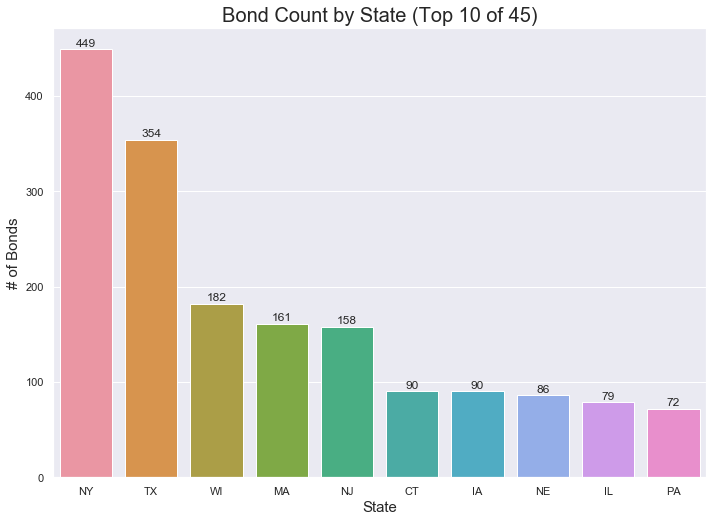

In [374]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette(sns.color_palette("Set2"))
c_plot = sns.countplot(x='State', data=muni_df,order=muni_df.State.value_counts().index[0:10])
c_plot.set_title('Bond Count by State (Top 10 of 45)', size=20)
c_plot.set_ylabel('# of Bonds', size=15)
c_plot.set_xlabel('State', size=15)

for p in c_plot.patches:
    height = p.get_height()
    c_plot.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{}'.format(height),
            ha="center") 

#sns.countplot(x='State', data=muni_df,order=muni_df.State.value_counts().index[0:10])

In [375]:
len(muni_df)

2139